In [59]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
import gym
import pygame
from bettermdptools.algorithms.rl import RL
import os
from examples.test_env import TestEnv
#plot state values
from examples.plots import Plots
from bettermdptools.algorithms.planner import Planner
from gym.envs.toy_text.frozen_lake import generate_random_map

In [61]:
import os
import warnings

import gym
import pygame
from bettermdptools.algorithms.rl import RL
from bettermdptools.algorithms.planner import Planner
from examples.test_env import TestEnv
import pickle

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import time

In [5]:
def v_iters_plot(data, label):
    df = pd.DataFrame(data=data)
    df.columns = [label]
    sns.set_theme(style="whitegrid")
    title = label + " v Iterations"
    sns.lineplot(x=df.index, y=label, data=df).set_title(title)
    plt.show()

In [6]:
class Blackjack:
    def __init__(self, seed):
        self._env = gym.make('Blackjack-v1', render_mode=None)
        self._env.reset(seed=seed)
        # Explanation of convert_state_obs lambda:
        # def function(state, done):
        # 	if done:
		#         return -1
        #     else:
        #         if state[2]:
        #             int(f"{state[0]+6}{(state[1]-2)%10}")
        #         else:
        #             int(f"{state[0]-4}{(state[1]-2)%10}")
        self._convert_state_obs = lambda state, done: (
            -1 if done else int(f"{state[0] + 6}{(state[1] - 2) % 10}") if state[2] else int(
                f"{state[0] - 4}{(state[1] - 2) % 10}"))
        # Transitions and rewards matrix from: https://github.com/rhalbersma/gym-blackjack-v1
#         current_dir = os.path.dirname(__file__)
#         file_name = 'blackjack-envP'
        f = "/Users/thomascho/omscs/ML/Markov Decision Processes/bettermdptools/examples/blackjack-envP"
        try:
            self._P = pickle.load(open(f, "rb"))
        except IOError:
            print("Pickle load failed.  Check path", f)
        self._n_actions = self.env.action_space.n
        self._n_states = len(self._P)

    @property
    def n_actions(self):
        return self._n_actions

    @n_actions.setter
    def n_actions(self, n_actions):
        self._n_actions = n_actions

    @property
    def n_states(self):
        return self._n_states

    @n_states.setter
    def n_states(self, n_states):
        self._n_states = n_states

    @property
    def P(self):
        return self._P

    @P.setter
    def P(self, P):
        self._P = P

    @property
    def env(self):
        return self._env

    @env.setter
    def env(self, env):
        self._env = env

    @property
    def convert_state_obs(self):
        return self._convert_state_obs

    @convert_state_obs.setter
    def convert_state_obs(self, convert_state_obs):
        self._convert_state_obs = convert_state_obs


## Plan

1. Try deterministic and set map
2. Try adding stochasticity
3. Try random map

In [7]:
seeds = [199,188,177,166,155]

## Repeat 5x for 5 experiments

# Value Iteration
## Blackjack
### No stochasticity
### Repeat 5x
### Set gamma to 0.9
### Set n_iterations to 10, 100, 1000

In [11]:
wall_clock_times_by_n_iters_vi = []
wall_clock_times_std_by_n_iters_vi = []
Vs_by_n_iters_vi = []
Vs_std_by_n_iters_vi = []
V_tracks_by_n_iters_vi = []
V_tracks_std_by_n_iters_vi = []
pis_by_n_iters_vi = []
pis_std_by_n_iters_vi = []
convergence_indexes_vi = []
gamma=.90
n_iters = [10, 100, 1000, 10000]
seeds = [1,2,3,4,5]
for n_iter in n_iters:
    inner_wall_clock_time = []
    inner_vs = []
    inner_v_tracks = []
    inner_pis = []
    inner_convergence_index = []
    for seed in seeds:
        blackjack = Blackjack(seed=seed)
        start = time.time()
        V, V_track, pi, convergence_index = Planner(blackjack.P).value_iteration(gamma=gamma,n_iters=n_iter)  # value iteration learning
        end = time.time()
        running_time = end - start
        #print("runtime = %.5f seconds" % running_time)
        inner_wall_clock_time.append(running_time)
        inner_vs.append(V)
        inner_v_tracks.append(V_track)
        inner_pis.append(pi)
        inner_convergence_index.append(convergence_index)
    wall_clock_times_by_n_iters_vi.append(np.mean(inner_wall_clock_time, axis=0))
    wall_clock_times_std_by_n_iters_vi.append(np.std(inner_wall_clock_time, axis=0))
    Vs_by_n_iters_vi.append(np.mean(inner_vs, axis=0))
    Vs_std_by_n_iters_vi.append(np.std(inner_vs, axis=0))
    V_tracks_by_n_iters_vi.append(np.mean(inner_v_tracks, axis=0))
    V_tracks_std_by_n_iters_vi.append(np.std(inner_v_tracks, axis=0))
    convergence_indexes_vi.append(np.mean(inner_convergence_index, axis=0))
#     pis_by_n_iters_vi.append(np.mean(inner_pis, axis=0))
#     pis_std_by_n_iters_vi.append(np.std(inner_pis, axis=0))    

/Users/thomascho/omscs/ML/Markov Decision Processes/bettermdptools/algorithms/planner.py:78: UserWarning: Max iterations reached before convergence.  Check theta and n_iters.  
  warnings.warn("Max iterations reached before convergence.  Check theta and n_iters.  ")


runtime = 0.04 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.05 seconds
runtime = 0.05 seconds
runtime = 0.06 seconds
runtime = 0.06 seconds
runtime = 0.05 seconds


# Value Iteration
## Blackjack by gamma 0.0, 0.2, 0.4, 0.6, 0.8, 1.0
### Repeat 5x
### Set n_iterations to 1k

In [20]:
wall_clock_times_by_gamma_vi = []
wall_clock_times_std_by_gamma_vi = []
Vs_by_gamma_vi = []
Vs_std_by_gamma_vi = []
V_tracks_by_gamma_vi = []
V_tracks_std_by_gamma_vi = []
pis_by_gamma_vi = []
pis_std_by_gamma_vi = []
convergence_indexes_by_gamma_vi = []
gammas = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
n_iters = 1000
for gamma in gammas:
    inner_wall_clock_time = []
    inner_vs = []
    inner_v_tracks = []
    inner_pis = []    
    inner_convergence_index = []
    for seed in seeds:    
        blackjack = Blackjack(seed=seed)
        start = time.time()
        V, V_track, pi, convergence_index = Planner(blackjack.P).value_iteration(gamma=gamma,n_iters=n_iter)  # value iteration learning
        end = time.time()
        running_time = end - start
        print("runtime = %.5f seconds" % running_time)
        inner_wall_clock_time.append(running_time)
        inner_vs.append(V)
        inner_v_tracks.append(V_track)
        inner_pis.append(pi)        
        inner_convergence_index.append(convergence_index)
    wall_clock_times_by_gamma_vi.append(np.mean(inner_wall_clock_time, axis=0))
    wall_clock_times_std_by_gamma_vi.append(np.std(inner_wall_clock_time, axis=0))
    Vs_by_gamma_vi.append(np.mean(inner_vs, axis=0))
    Vs_std_by_gamma_vi.append(np.std(inner_vs, axis=0))
    V_tracks_by_gamma_vi.append(np.mean(inner_v_tracks, axis=0))
    V_tracks_std_by_gamma_vi.append(np.std(inner_v_tracks, axis=0))
    convergence_indexes_by_gamma_vi.append(np.mean(inner_convergence_index, axis=0))

runtime = 0.03 seconds
runtime = 0.02870 seconds
runtime = 0.03 seconds
runtime = 0.02970 seconds
runtime = 0.02 seconds
runtime = 0.02493 seconds
runtime = 0.02 seconds
runtime = 0.02403 seconds
runtime = 0.02 seconds
runtime = 0.02321 seconds
runtime = 0.04 seconds
runtime = 0.04126 seconds
runtime = 0.04 seconds
runtime = 0.03542 seconds
runtime = 0.03 seconds
runtime = 0.03354 seconds
runtime = 0.03 seconds
runtime = 0.03262 seconds
runtime = 0.03 seconds
runtime = 0.03243 seconds
runtime = 0.04 seconds
runtime = 0.03972 seconds
runtime = 0.04 seconds
runtime = 0.03873 seconds
runtime = 0.04 seconds
runtime = 0.03898 seconds
runtime = 0.04 seconds
runtime = 0.04119 seconds
runtime = 0.05 seconds
runtime = 0.04761 seconds
runtime = 0.05 seconds
runtime = 0.04718 seconds
runtime = 0.04 seconds
runtime = 0.03784 seconds
runtime = 0.04 seconds
runtime = 0.03627 seconds
runtime = 0.04 seconds
runtime = 0.03788 seconds
runtime = 0.03 seconds
runtime = 0.03486 seconds
runtime = 0.04 secon

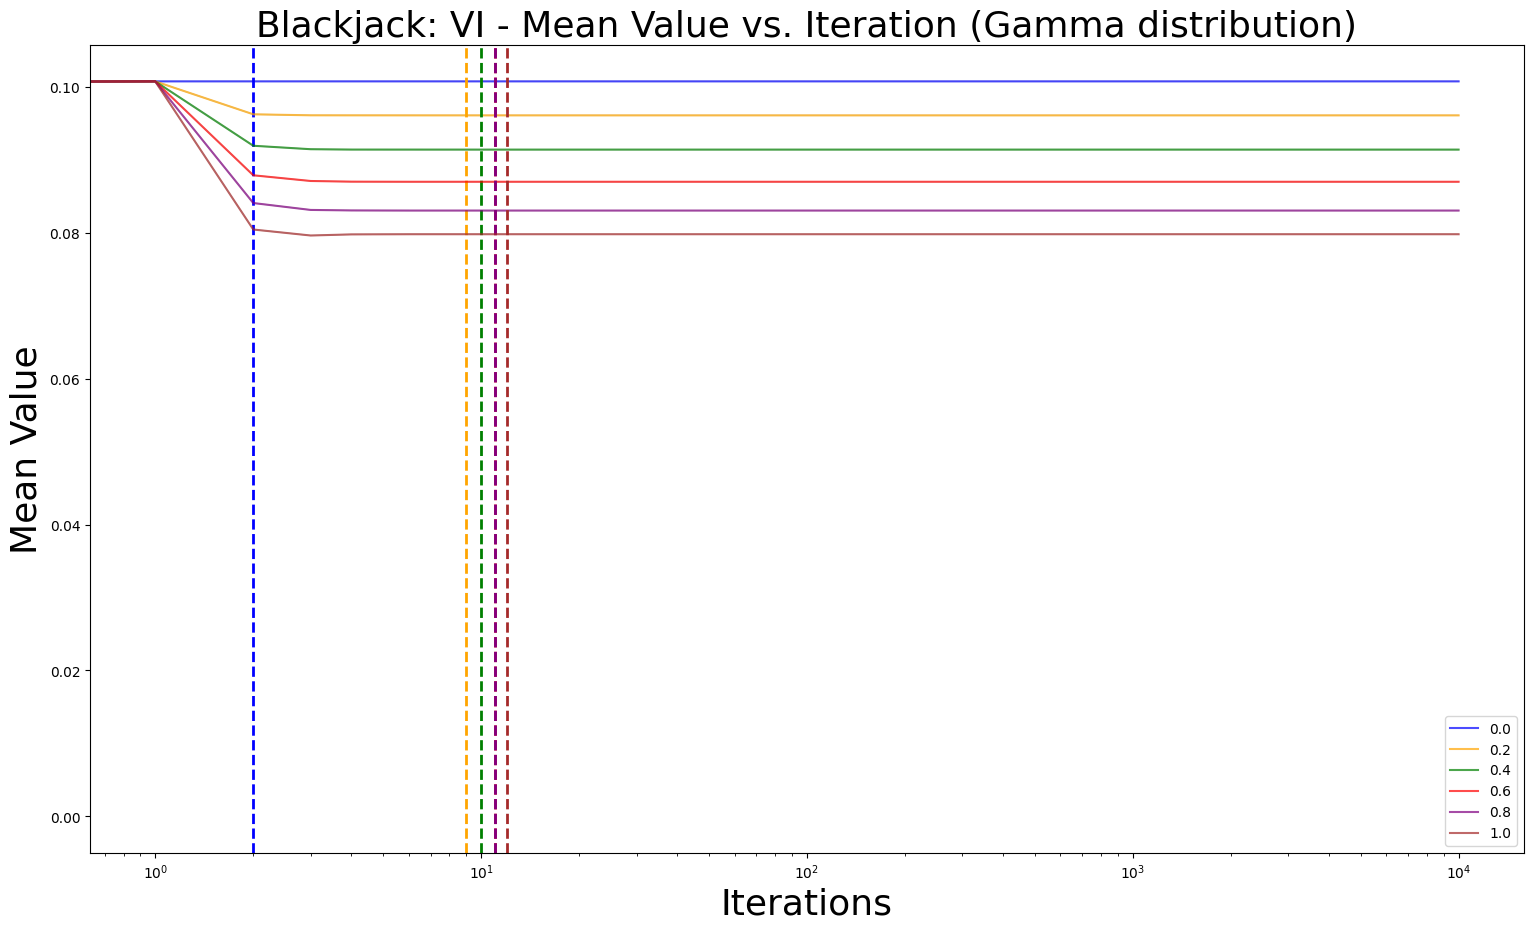

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
n_iters = 10000
for i in range(len(gammas)):
    mean_value_per_iter = np.mean(V_tracks_by_gamma_vi[i], axis=1)  # max value per iteration
    mean_value_per_iter_std = np.mean(V_tracks_std_by_gamma_vi[i], axis=1)    
    lower_std = np.array(mean_value_per_iter) - np.array(mean_value_per_iter_std)
    upper_std = np.array(mean_value_per_iter) + np.array(mean_value_per_iter_std)
    ax.plot(range(0,n_iters), mean_value_per_iter, label=gammas[i], alpha=0.7, color=colors[i])
    ax.fill_between(range(0,n_iters), lower_std, upper_std, color='grey', alpha=0.2)
    ax.axvline(x=convergence_indexes_by_gamma_vi[i],color=colors[i], ls='--', lw=2)
    ax.set_xscale('log', base=10)
ax.set_title("Blackjack: VI - Mean Value vs. Iteration (Gamma distribution)", fontsize=26)
ax.set_xlabel('Iterations', fontsize=26)
ax.set_ylabel('Mean Value', fontsize=26)
ax.legend(loc='lower right')
plt.savefig("/Users/thomascho/omscs/ML/Markov Decision Processes/charts/bj_vl_gamma.png")
plt.show()

In [23]:
# '''
# Plot Max state values vs iterations AND PLOT DIFFERENT GAMMAS
# '''
# # Plot the policy grid
# fig, ax = plt.subplots()
# fig.set_size_inches(18.5, 10.5)
# for i in range(len(gammas)):
#     sum_value_per_iter = np.sum(V_tracks_by_gamma_vi[i], axis=1)  # sum reward over all states
# #     mean_value_per_iter_std = np.mean(V_tracks_std_by_gamma_vi[i], axis=1)    
# #     lower_std = np.array(mean_value_per_iter) - np.array(mean_value_per_iter_std)
# #     upper_std = np.array(mean_value_per_iter) + np.array(mean_value_per_iter_std)
#     ax.plot(range(0,n_iters), sum_value_per_iter, label=gammas[i], alpha=0.7)
# #     ax.fill_between(range(0,n_iters), lower_std, upper_std, color='grey', alpha=0.2)
#     ax.set_xscale('log', base=10)
# ax.set_title("Blackjack: VI - Cumulative Reward vs. Iteration", fontsize=26)
# ax.set_xlabel('Iterations', fontsize=26)
# ax.set_ylabel('Mean Value', fontsize=26)
# ax.legend(loc='lower right')
# plt.show()

In [26]:
# fig, ax = plt.subplots()
# fig.set_size_inches(18.5, 10.5)
# lower_std = np.array(wall_clock_times_by_gamma_vi) - np.array(wall_clock_times_std_by_gamma_vi)
# upper_std = np.array(wall_clock_times_by_gamma_vi) + np.array(wall_clock_times_std_by_gamma_vi)
# ax.plot(gammas, wall_clock_times_by_gamma_vi, label="VI", marker='o')
# # ax.fill_between(gammas, lower_std, upper_std, color='grey', alpha=0.2)
# ax.set_title("Blackjack: VI - Wall Clock Time vs. Gamma", fontsize=26)
# ax.set_xlabel('Gammas', fontsize=26)
# ax.set_ylabel('Wall Clock Time', fontsize=26)
# ax.legend(loc='lower right')

# plt.show()

## Best VI

In [138]:
V, V_track, pi, convergence_index = Planner(blackjack.P).value_iteration(gamma=.9,n_iters=n_iters)  # value iteration learning

runtime = 0.29 seconds


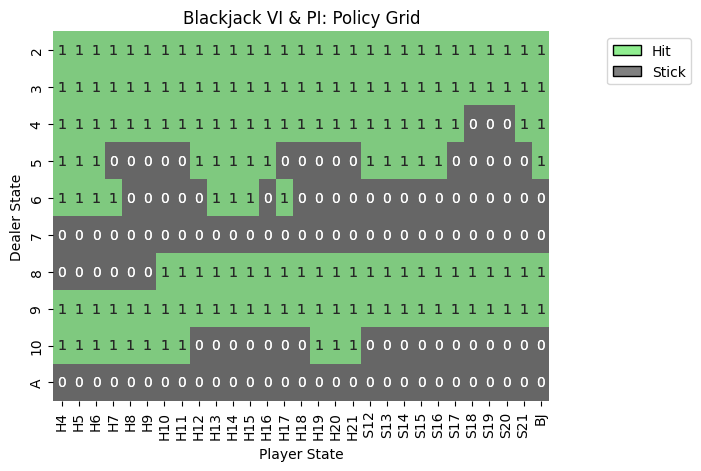

In [139]:
policy_grid_vi = np.zeros((10, 29))
index = 0
for i in range(10):
    for j in range(29):
        policy_grid_vi[i][j] = pi[index]
        index += 1
        
# plot the policy
fig.add_subplot(1, 2, 2)
ax2 = sns.heatmap(policy_grid_vi, linewidth=0, annot=True, cmap="Accent_r", cbar=False)
ax2.set_title(f"Blackjack VI & PI: Policy Grid")
ax2.set_xlabel("Player State")
ax2.set_ylabel("Dealer State")
ax2.set_xticklabels(player_states)
ax2.set_yticklabels(dealer_states)

# add a legend
legend_elements = [
    Patch(facecolor="lightgreen", edgecolor="black", label="Hit"),
    Patch(facecolor="grey", edgecolor="black", label="Stick"),
]
ax2.legend(handles=legend_elements, bbox_to_anchor=(1.3, 1))
policy_grid2 = np.zeros((10, 29))
index = 0
for i in range(10):
    for j in range(29):
        policy_grid2[i][j] = pi[index]
        index += 1

# plot the policy
fig.add_subplot(1, 2, 2)
ax2 = sns.heatmap(policy_grid2, linewidth=0, annot=True, cmap="Accent_r", cbar=False)
ax2.set_title(f"Blackjack VI & PI: Policy Grid")
ax2.set_xlabel("Player State")
ax2.set_ylabel("Dealer State")
ax2.set_xticklabels(player_states)
ax2.set_yticklabels(dealer_states)

# add a legend
legend_elements = [
    Patch(facecolor="lightgreen", edgecolor="black", label="Hit"),
    Patch(facecolor="grey", edgecolor="black", label="Stick"),
]
ax2.legend(handles=legend_elements, bbox_to_anchor=(1.3, 1))
plt.savefig("/Users/thomascho/omscs/ML/Markov Decision Processes/charts/bj_vi_policy.png")
plt.show()

# Policy Iteration

# Policy Iteration
## Blackjack
### Repeat 5x
### Set gamma to 0.9
### Set n_iterations to 10, 100, 1000

In [13]:
wall_clock_times_by_n_iters_pi = []
wall_clock_times_std_by_n_iters_pi = []
Vs_by_n_iters_pi = []
Vs_std_by_n_iters_pi = []
V_tracks_by_n_iters_pi = []
V_tracks_std_by_n_iters_pi = []
pis_by_n_iters_pi = []
pis_std_by_n_iters_pi = []
convergence_indexes_pi = []
gamma=.90
n_iters = [10, 100, 1000, 10000]
for n_iter in n_iters:
    inner_wall_clock_time = []
    inner_vs = []
    inner_v_tracks = []
    inner_pis = []
    inner_convergence_index = []
    for seed in seeds:
        blackjack = Blackjack(seed=seed)
        start = time.time()
        V, V_track, pi, convergence_index = Planner(blackjack.P).value_iteration(gamma=gamma,n_iters=n_iter)  # value iteration learning
        end = time.time()
        running_time = end - start
        #print("runtime = %.5f seconds" % running_time)
        inner_wall_clock_time.append(running_time)
        inner_vs.append(V)
        inner_v_tracks.append(V_track)
        inner_pis.append(pi)
        inner_convergence_index.append(convergence_index)
    wall_clock_times_by_n_iters_pi.append(np.mean(inner_wall_clock_time, axis=0))
    wall_clock_times_std_by_n_iters_pi.append(np.std(inner_wall_clock_time, axis=0))
    Vs_by_n_iters_pi.append(np.mean(inner_vs, axis=0))
    Vs_std_by_n_iters_pi.append(np.std(inner_vs, axis=0))
    V_tracks_by_n_iters_pi.append(np.mean(inner_v_tracks, axis=0))
    V_tracks_std_by_n_iters_pi.append(np.std(inner_v_tracks, axis=0))
    convergence_indexes_pi.append(np.mean(inner_convergence_index, axis=0))
#     pis_by_n_iters_pi.append(np.mean(inner_pis, axis=0))
#     pis_std_by_n_iters_pi.append(np.std(inner_pis, axis=0))

runtime = 0.04 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.06 seconds
runtime = 0.06 seconds
runtime = 0.06 seconds
runtime = 0.05 seconds
runtime = 0.05 seconds


In [39]:
wall_clock_times_by_gamma_pi = []
wall_clock_times_std_by_gamma_pi = []
Vs_by_gamma_pi = []
Vs_std_by_gamma_pi = []
V_tracks_by_gamma_pi = []
V_tracks_std_by_gamma_pi = []
pis_by_gamma_pi = []
pis_std_by_gamma_pi = []
convergence_indexes_by_gamma_pi = []
gammas = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
n_iters = 1000
for gamma in gammas:
    inner_wall_clock_time = []
    inner_vs = []
    inner_v_tracks = []
    inner_pis = []
    inner_convergence_indexes = []
    for seed in seeds:    
        blackjack = Blackjack(seed=seed)
        start = time.time()
        V, V_track, pi, convergence_index = Planner(blackjack.P).policy_iteration(gamma=gamma,n_iters=n_iters)  # value iteration learning
        end = time.time()
        running_time = end - start
        print("runtime = %.5f seconds" % running_time)
        inner_wall_clock_time.append(running_time)
        inner_vs.append(V)
        inner_v_tracks.append(V_track)
        inner_pis.append(pi)       
        inner_convergence_indexes.append(convergence_index)
    wall_clock_times_by_gamma_pi.append(np.mean(inner_wall_clock_time, axis=0))
    wall_clock_times_std_by_gamma_pi.append(np.std(inner_wall_clock_time, axis=0))
    Vs_by_gamma_pi.append(np.mean(inner_vs, axis=0))
    Vs_std_by_gamma_pi.append(np.std(inner_vs, axis=0))
    V_tracks_by_gamma_pi.append(np.mean(inner_v_tracks, axis=0))
    V_tracks_std_by_gamma_pi.append(np.std(inner_v_tracks, axis=0))
    convergence_indexes_by_gamma_pi.append(np.mean(inner_convergence_indexes, axis=0))

runtime = 0.02 seconds
runtime = 0.01679 seconds
runtime = 0.01 seconds
runtime = 0.01414 seconds
runtime = 0.02 seconds
runtime = 0.01648 seconds
runtime = 0.02 seconds
runtime = 0.02391 seconds
runtime = 0.01 seconds
runtime = 0.01198 seconds
runtime = 0.04 seconds
runtime = 0.03829 seconds
runtime = 0.04 seconds
runtime = 0.03653 seconds
runtime = 0.04 seconds
runtime = 0.03748 seconds
runtime = 0.04 seconds
runtime = 0.04213 seconds
runtime = 0.05 seconds
runtime = 0.04733 seconds
runtime = 0.05 seconds
runtime = 0.05031 seconds
runtime = 0.05 seconds
runtime = 0.04663 seconds
runtime = 0.05 seconds
runtime = 0.05375 seconds
runtime = 0.05 seconds
runtime = 0.04881 seconds
runtime = 0.05 seconds
runtime = 0.04740 seconds
runtime = 0.05 seconds
runtime = 0.05145 seconds
runtime = 0.05 seconds
runtime = 0.05467 seconds
runtime = 0.04 seconds
runtime = 0.04351 seconds
runtime = 0.04 seconds
runtime = 0.04461 seconds
runtime = 0.05 seconds
runtime = 0.05122 seconds
runtime = 0.07 secon

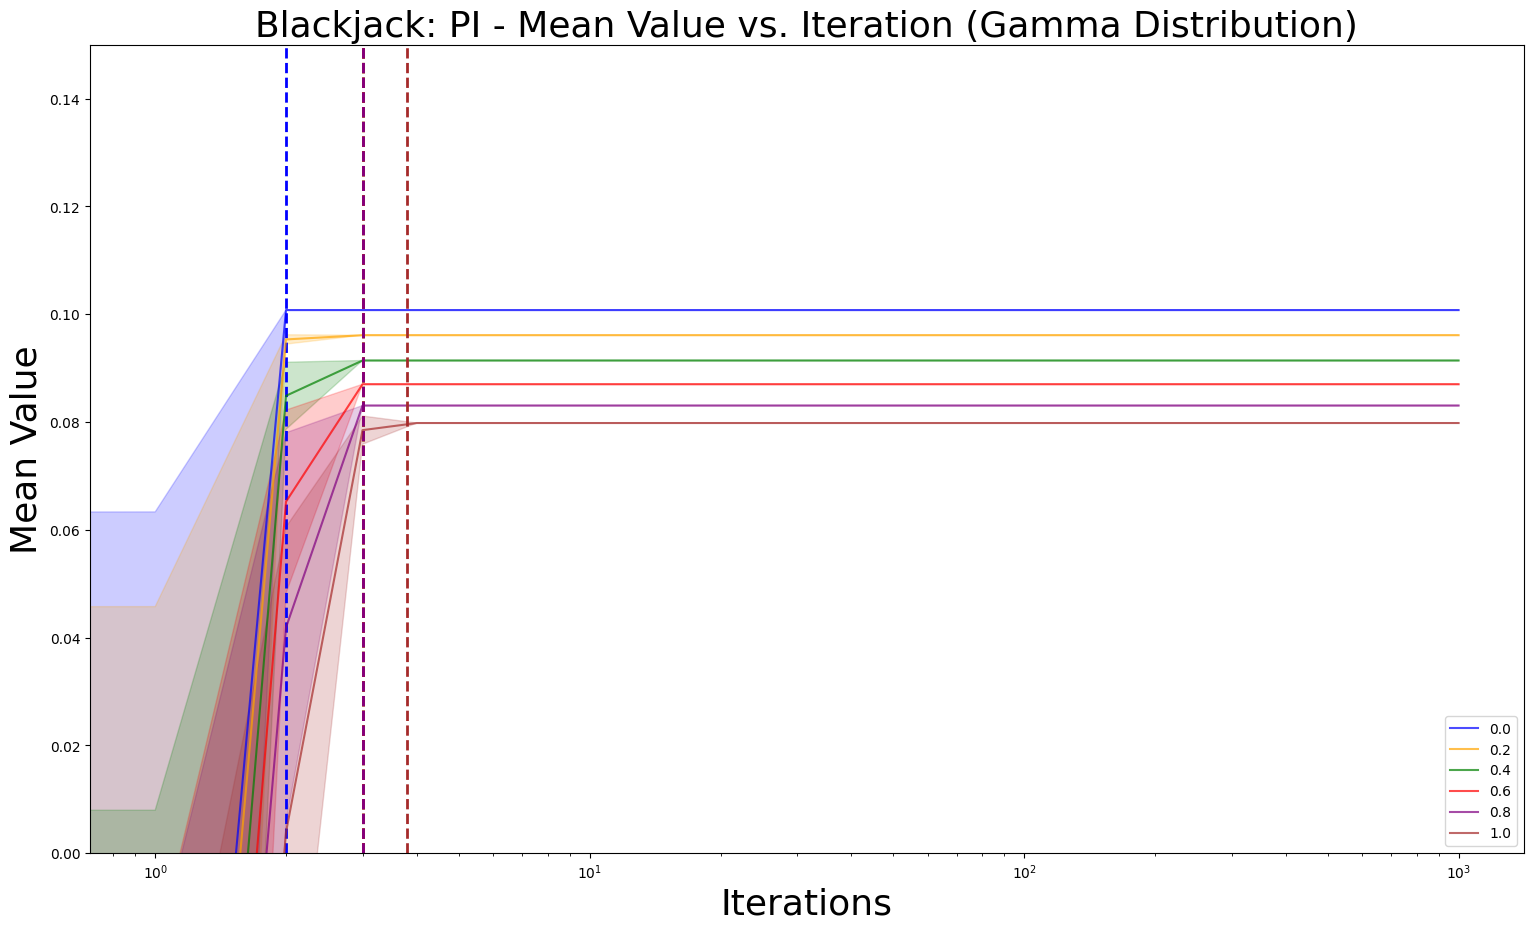

In [44]:
'''
Plot Max state values vs iterations AND PLOT DIFFERENT GAMMAS
'''
# Plot the policy grid
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
colors = ["blue", "orange", "green", "red", "purple", "brown"]
for i in range(len(gammas)):
    mean_value_per_iter = np.mean(V_tracks_by_gamma_pi[i], axis=1)  # max value per iteration
    mean_value_per_iter_std = np.mean(V_tracks_std_by_gamma_pi[i], axis=1)    
    lower_std = np.array(mean_value_per_iter) - np.array(mean_value_per_iter_std)
    upper_std = np.array(mean_value_per_iter) + np.array(mean_value_per_iter_std)
    ax.plot(range(0,n_iters), mean_value_per_iter, label=gammas[i], alpha=0.7, color=colors[i])
    ax.fill_between(range(0,n_iters), lower_std, upper_std, color=colors[i], alpha=0.2)
    ax.axvline(x=convergence_indexes_by_gamma_pi[i],color=colors[i], ls='--', lw=2)
    ax.set_xscale('log', base=10)
    ax.set_ylim([0,.15])
ax.set_title("Blackjack: PI - Mean Value vs. Iteration (Gamma Distribution)", fontsize=26)
ax.set_xlabel('Iterations', fontsize=26)
ax.set_ylabel('Mean Value', fontsize=26)
ax.legend(loc='lower right')
plt.savefig("/Users/thomascho/omscs/ML/Markov Decision Processes/charts/bj_pl_gamma.png")

plt.show()

## Best PI

In [127]:
V, V_track, pi, convergence_index = Planner(blackjack.P).policy_iteration(gamma=.9,n_iters=n_iters)  # value iteration learning

runtime = 0.49 seconds


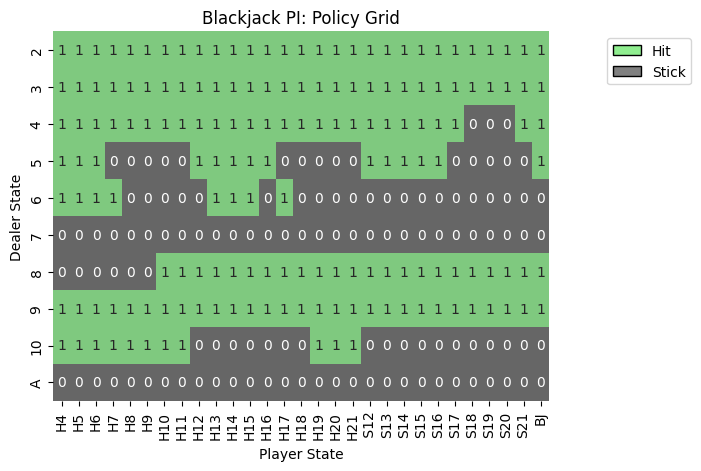

In [129]:
policy_grid_pi = np.zeros((10, 29))
index = 0
for i in range(10):
    for j in range(29):
        policy_grid_pi[i][j] = pi[index]
        index += 1
        
# plot the policy
fig.add_subplot(1, 2, 2)
ax2 = sns.heatmap(policy_grid_pi, linewidth=0, annot=True, cmap="Accent_r", cbar=False)
ax2.set_title(f"Blackjack PI: Policy Grid")
ax2.set_xlabel("Player State")
ax2.set_ylabel("Dealer State")
ax2.set_xticklabels(player_states)
ax2.set_yticklabels(dealer_states)

# add a legend
legend_elements = [
    Patch(facecolor="lightgreen", edgecolor="black", label="Hit"),
    Patch(facecolor="grey", edgecolor="black", label="Stick"),
]
ax2.legend(handles=legend_elements, bbox_to_anchor=(1.3, 1))
plt.savefig("/Users/thomascho/omscs/ML/Markov Decision Processes/charts/bj_pi_policy.png")
plt.show()

# Plots for both VI and PI

## Max Value per iteration by N_iterations

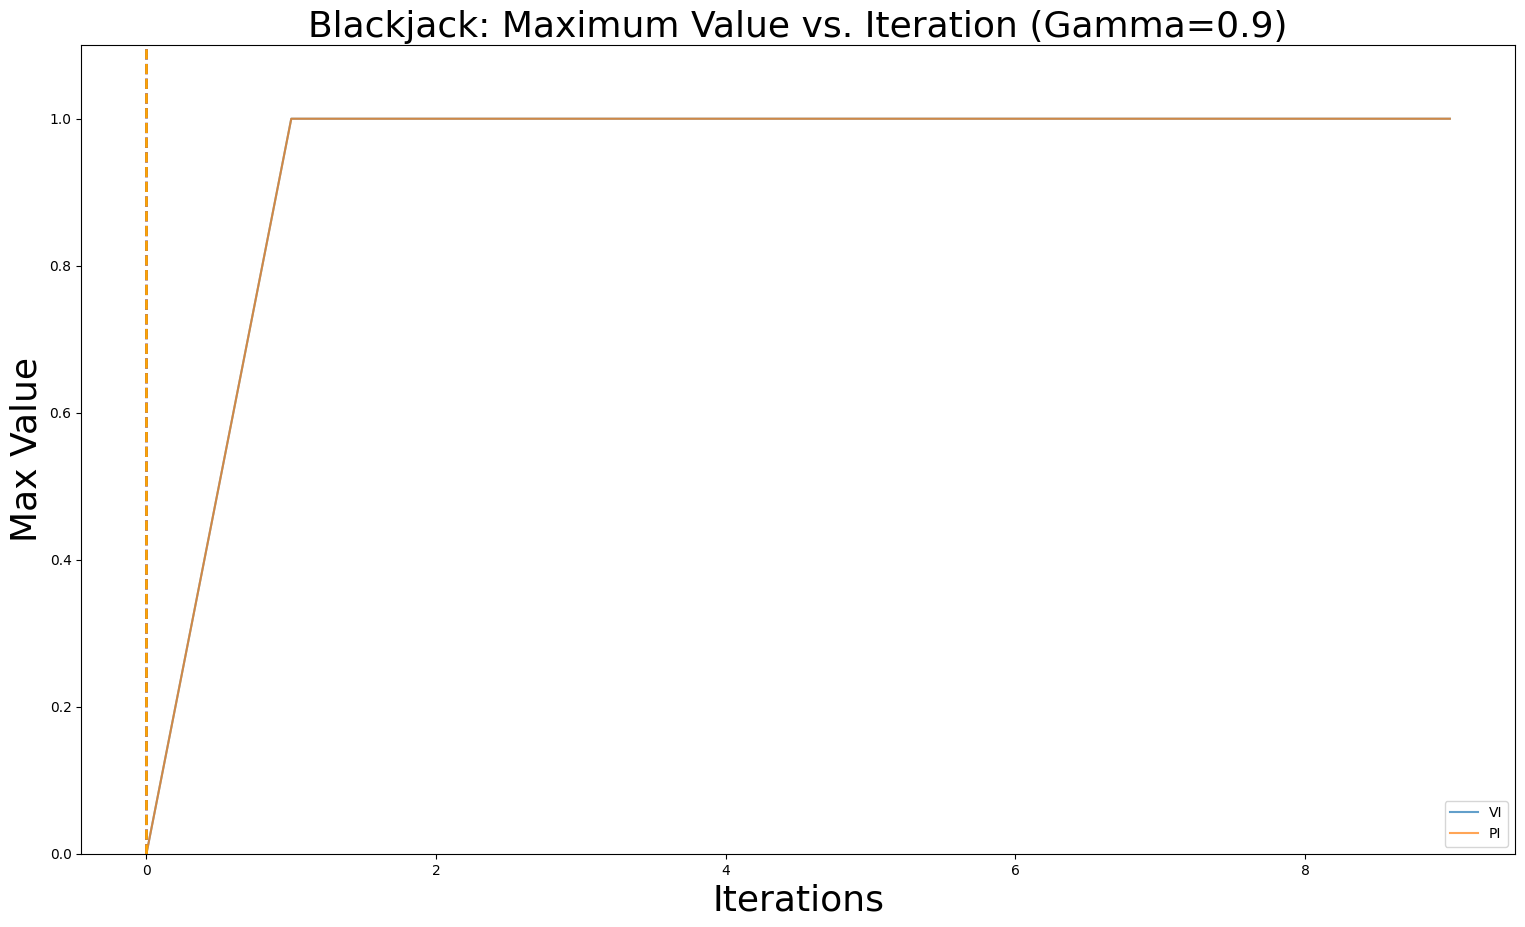

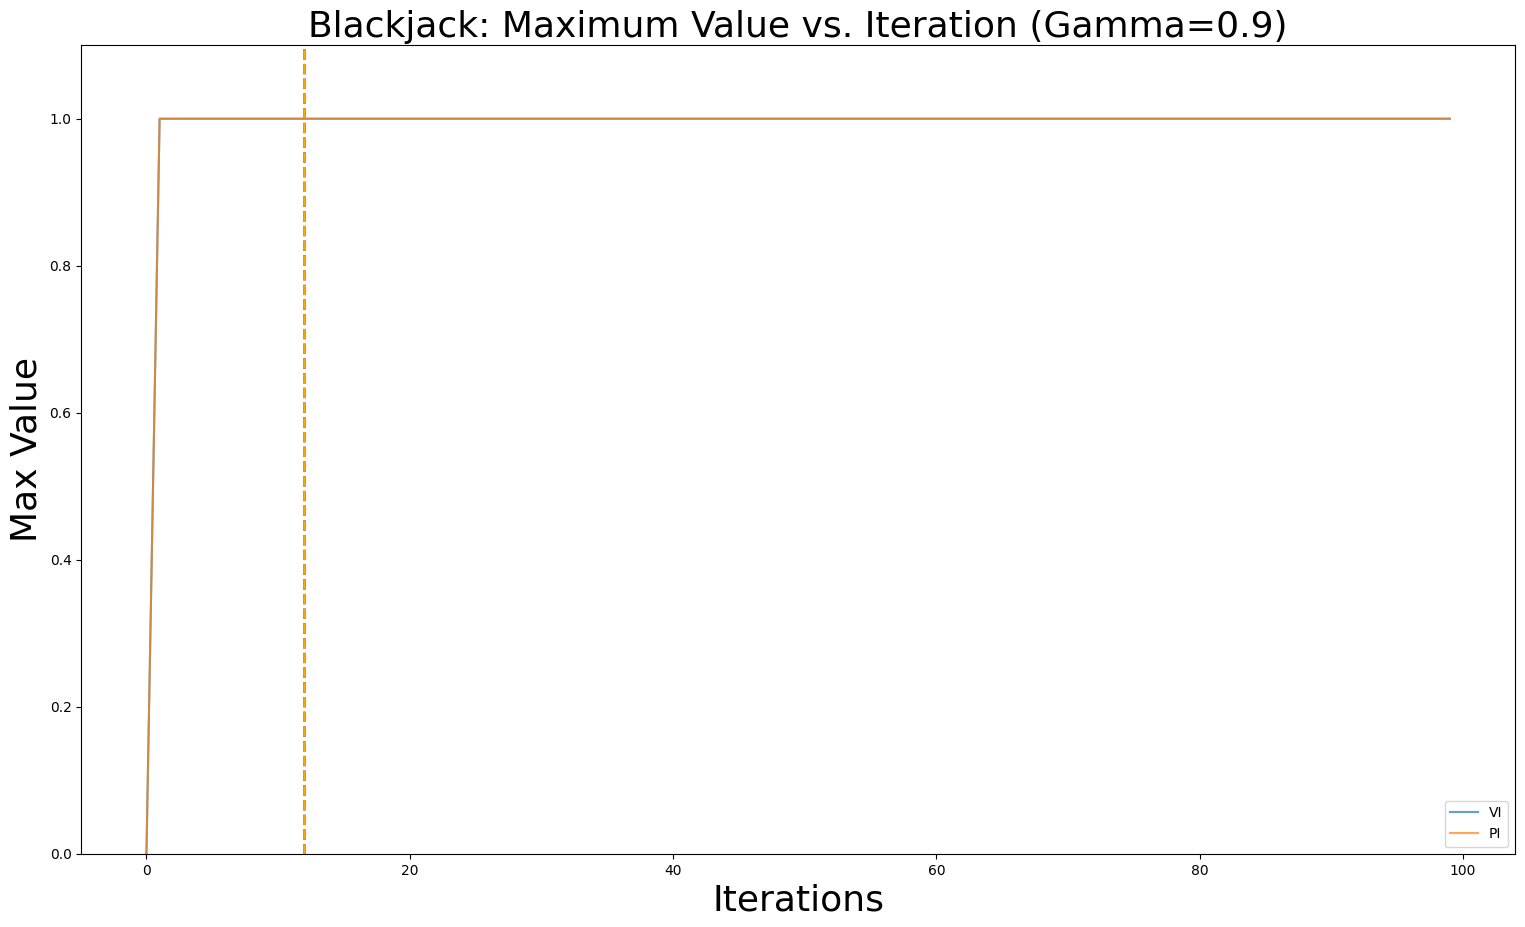

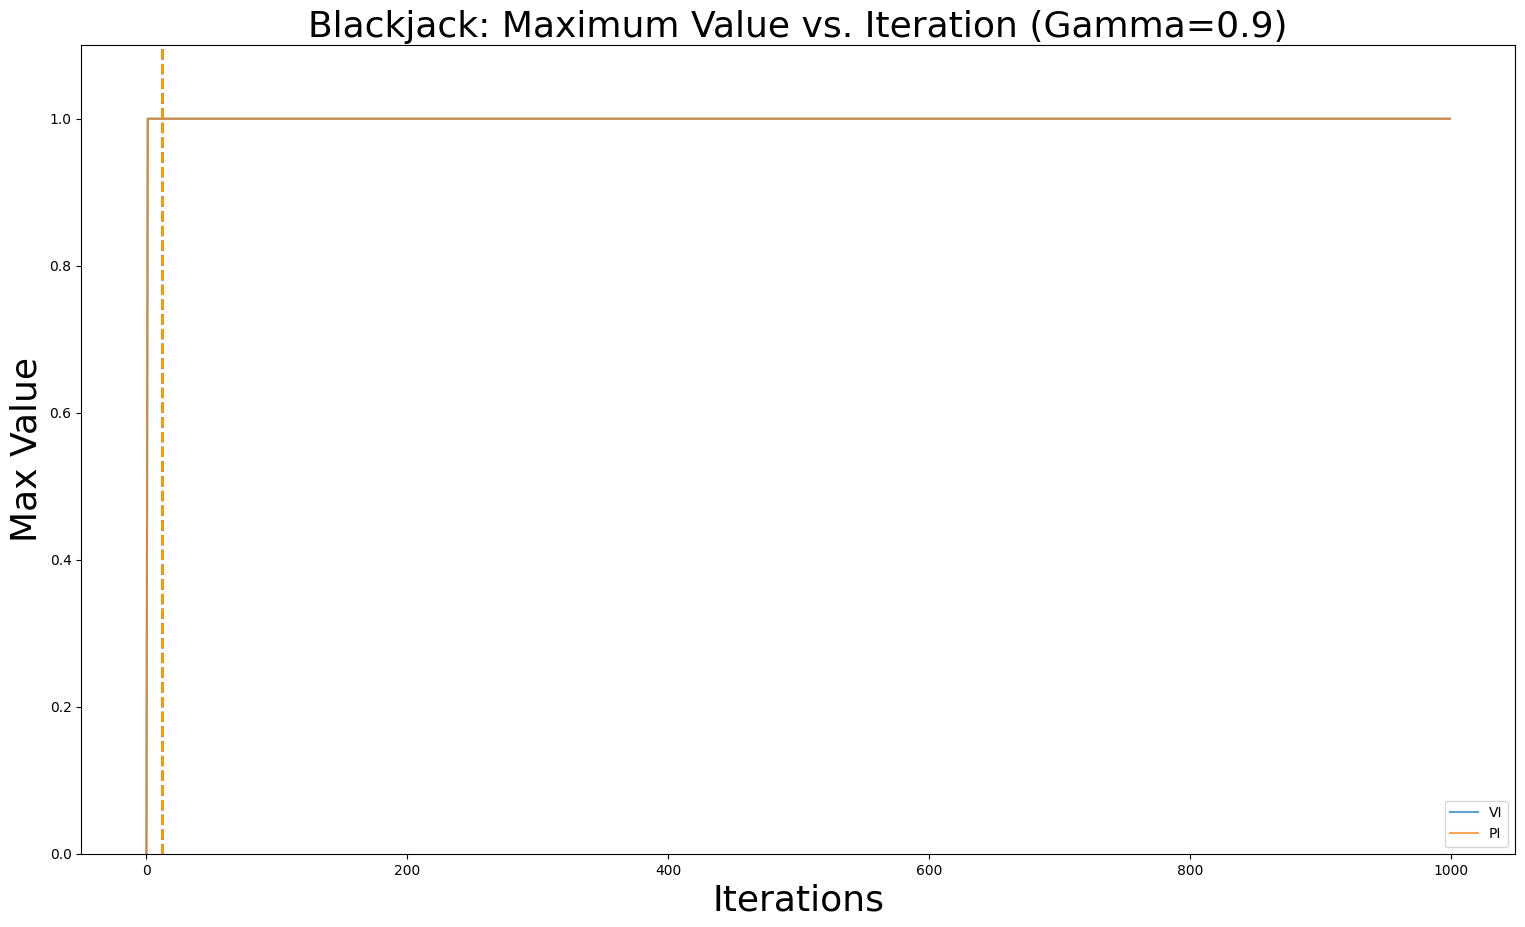

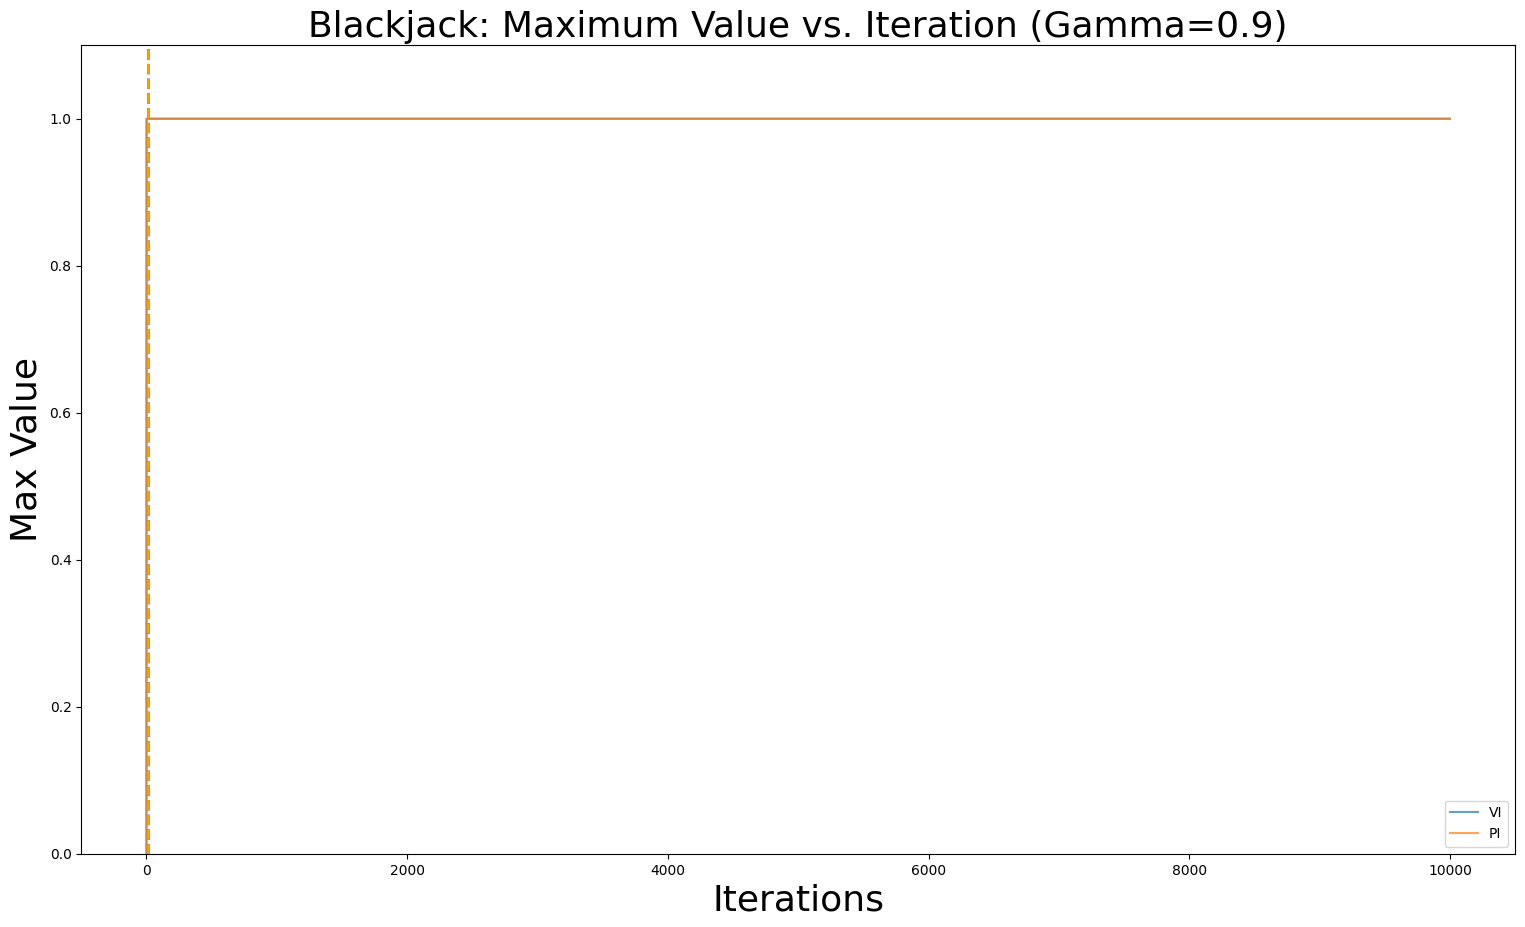

In [14]:
for i in range(len(n_iters)):
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    max_value_per_iter = np.amax(V_tracks_by_n_iters_vi[i], axis=1)  # max value of all states per iteration
    max_value_std_per_iter = np.amax(V_tracks_by_n_iters_vi[i], axis=1)
    ax.plot(range(len(max_value_per_iter)), max_value_per_iter, label="VI", alpha=0.7)
    ax.axvline(x=convergence_indexes_vi[i], color='blue', ls='--', lw=2)
    lower_std = np.array(max_value_per_iter) - np.array(max_value_std_per_iter)
    upper_std = np.array(max_value_per_iter) + np.array(max_value_std_per_iter)
#     ax.fill_between(range(len(max_value_per_iter)), lower_std, upper_std, alpha=0.2)   

    max_value_per_iter = np.amax(V_tracks_by_n_iters_pi[i], axis=1)  # max value of all states per iteration
    max_value_std_per_iter = np.amax(V_tracks_by_n_iters_pi[i], axis=1)
    ax.plot(range(len(max_value_per_iter)), max_value_per_iter, label="PI", alpha=0.7)
    ax.axvline(x=convergence_indexes_pi[i], color='orange', ls='--', lw=2)
    lower_std = np.array(max_value_per_iter) - np.array(max_value_std_per_iter)
    upper_std = np.array(max_value_per_iter) + np.array(max_value_std_per_iter)
#     ax.set_xscale('log', base=10)
    ax.set_ylim(0,1.1)
    ax.set_title(f"Blackjack: Maximum Value vs. Iteration (Gamma=0.9)", fontsize=26)
    ax.set_xlabel('Iterations', fontsize=26)
    ax.set_ylabel('Max Value', fontsize=26)
    ax.legend(loc='lower right')
    plt.savefig(f"/Users/thomascho/omscs/ML/Markov Decision Processes/charts/bj_vl_pl_convergence_{n_iters[i]}.png")
    plt.show()

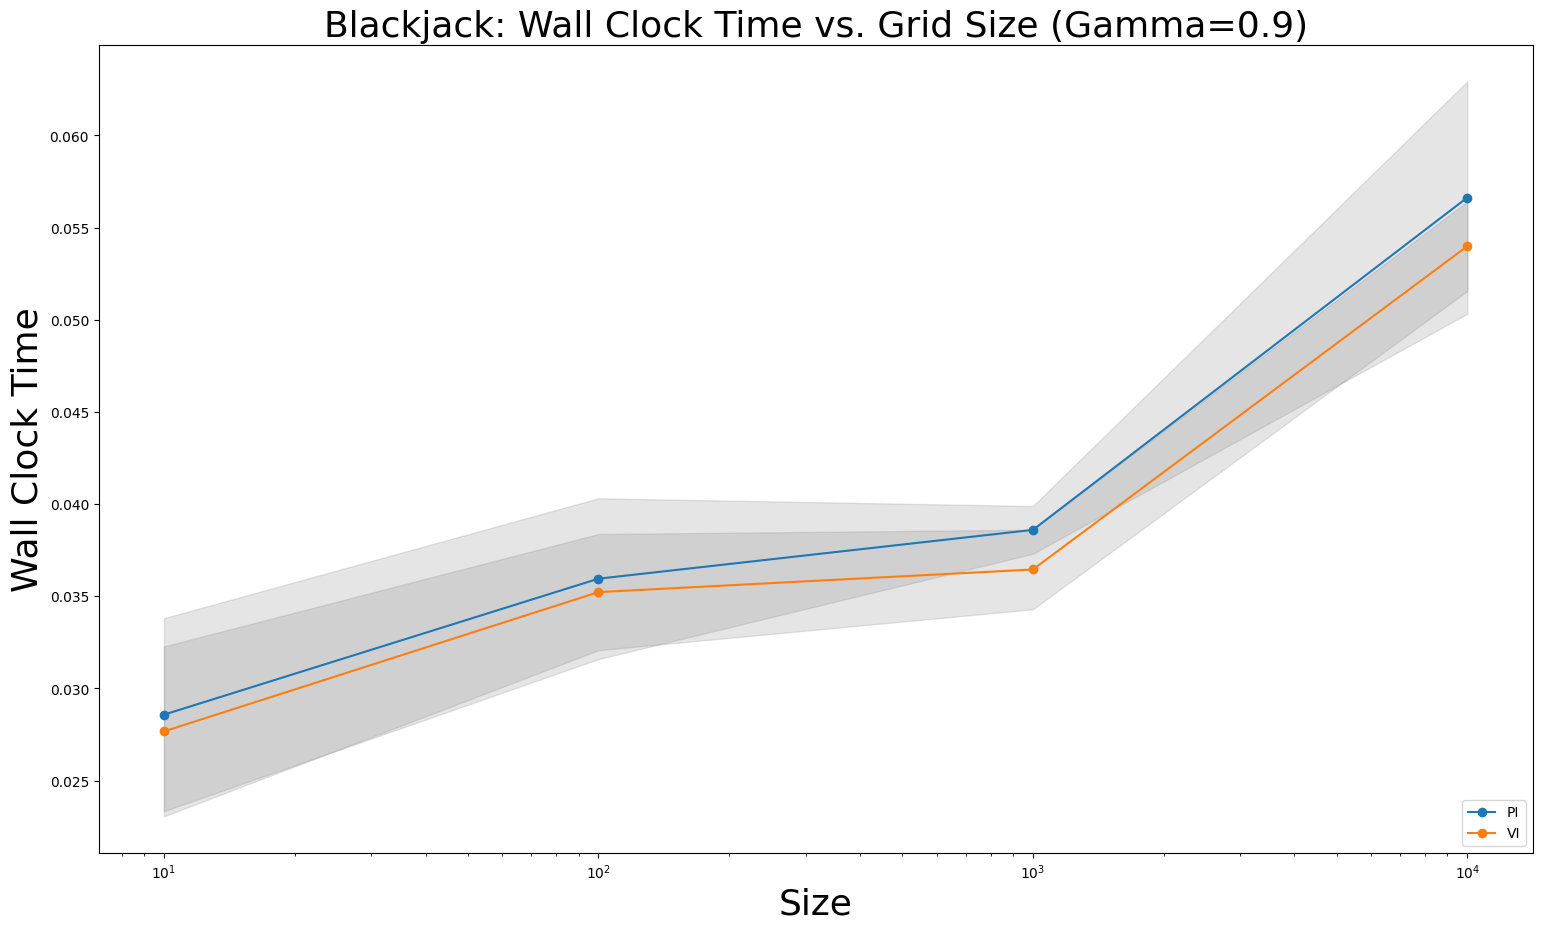

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
n_iters = [10, 100, 1000, 10000]
lower_std = np.array(wall_clock_times_by_n_iters_pi) - np.array(wall_clock_times_std_by_n_iters_pi)
upper_std = np.array(wall_clock_times_by_n_iters_pi) + np.array(wall_clock_times_std_by_n_iters_pi)
ax.plot(n_iters, wall_clock_times_by_n_iters_pi, label="PI", marker='o')
ax.fill_between(n_iters, lower_std, upper_std, color='grey', alpha=0.2)

lower_std = np.array(wall_clock_times_by_n_iters_vi) - np.array(wall_clock_times_std_by_n_iters_vi)
upper_std = np.array(wall_clock_times_by_n_iters_vi) + np.array(wall_clock_times_std_by_n_iters_vi)
ax.plot(n_iters, wall_clock_times_by_n_iters_vi, label="VI", marker='o')
ax.fill_between(n_iters, lower_std, upper_std, color='grey', alpha=0.2)


ax.set_title("Blackjack: Wall Clock Time vs. Grid Size (Gamma=0.9)", fontsize=26)
ax.set_xlabel('Size', fontsize=26)
ax.set_ylabel('Wall Clock Time', fontsize=26)
ax.legend(loc='lower right')
ax.set_xscale('log', base=10)
plt.savefig("/Users/thomascho/omscs/ML/Markov Decision Processes/charts/bj_vl_pl_time_n_iters.png")
plt.show()

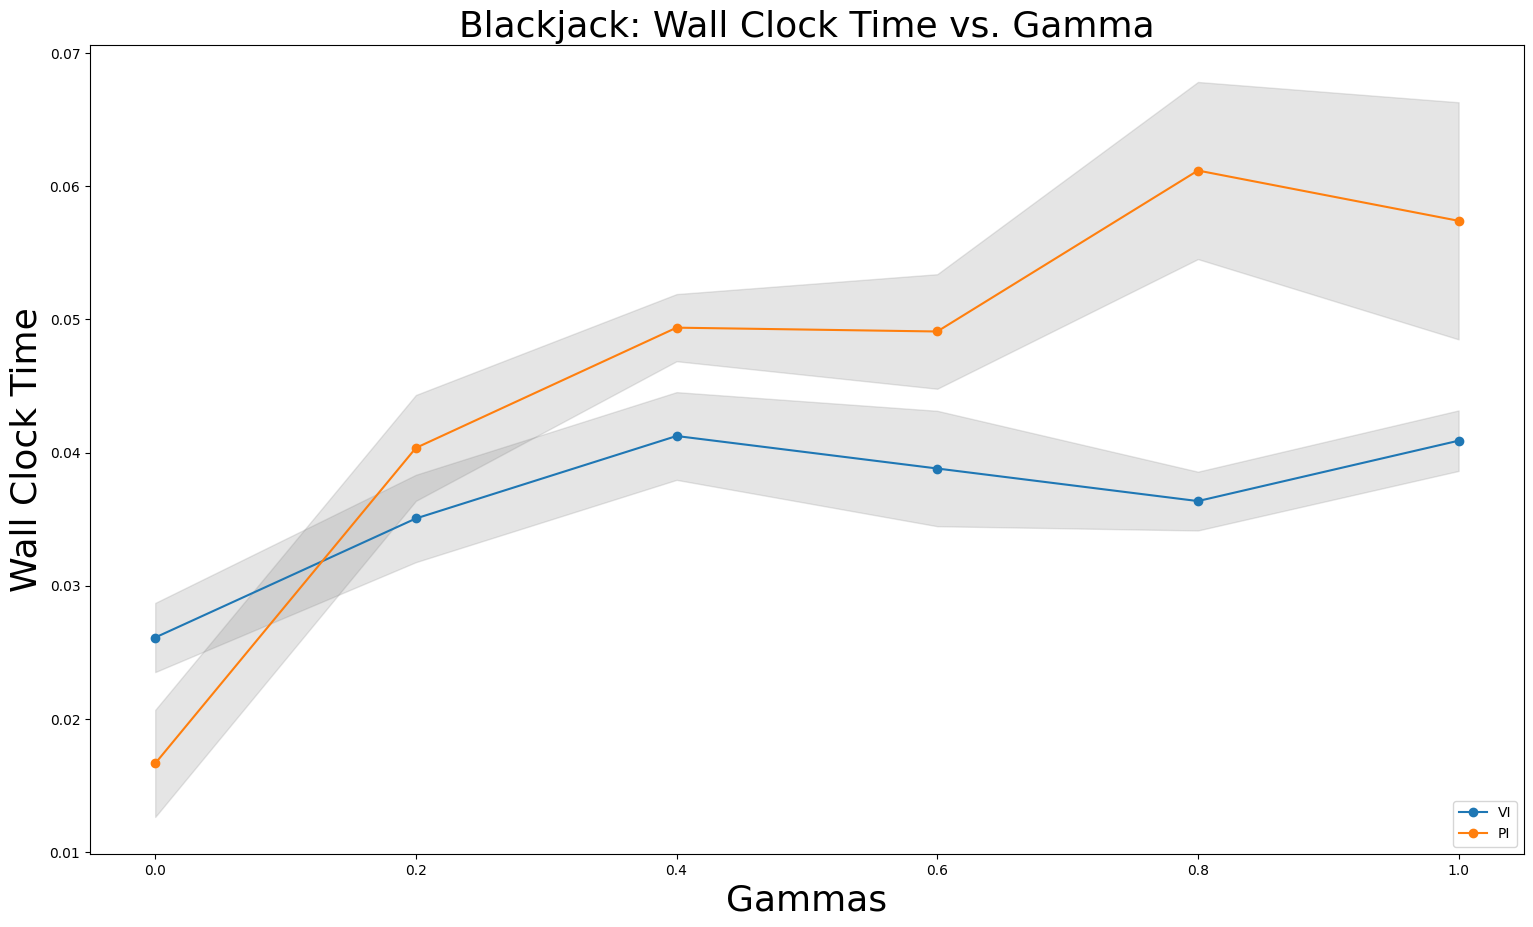

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
lower_std = np.array(wall_clock_times_by_gamma_vi) - np.array(wall_clock_times_std_by_gamma_vi)
upper_std = np.array(wall_clock_times_by_gamma_vi) + np.array(wall_clock_times_std_by_gamma_vi)
ax.plot(gammas, wall_clock_times_by_gamma_vi, label="VI", marker='o')
ax.fill_between(gammas, lower_std, upper_std, color='grey', alpha=0.2)


lower_std = np.array(wall_clock_times_by_gamma_pi) - np.array(wall_clock_times_std_by_gamma_pi)
upper_std = np.array(wall_clock_times_by_gamma_pi) + np.array(wall_clock_times_std_by_gamma_pi)
ax.plot(gammas, wall_clock_times_by_gamma_pi, label="PI", marker='o')
ax.fill_between(gammas, lower_std, upper_std, color='grey', alpha=0.2)
ax.set_title("Blackjack: Wall Clock Time vs. Gamma", fontsize=26)
ax.set_xlabel('Gammas', fontsize=26)
ax.set_ylabel('Wall Clock Time', fontsize=26)
ax.legend(loc='lower right')
plt.savefig("/Users/thomascho/omscs/ML/Markov Decision Processes/charts/bj_vl_time_gamma.png")
plt.show()

In [101]:
def convert_tuple(state, done):
    if done:
        return -1
    else:
        if state[2]:
            return int(f"{state[0]+6}{(state[1]-2)%10}")
        else:
            return int(f"{state[0]-4}{(state[1]-2)%10}")

In [102]:
290/10/29

1.0

In [103]:
obs_space = []
converted = []
n = 0
for i in range(29):
    for j in range(10):
        n+=1
        obs_space.append((i,j,False))
        converted.append(convert_tuple((i,j,False),False))
print(n)

290


In [104]:
from collections import Counter
Counter(converted)

Counter({-48: 1,
         -49: 1,
         -40: 1,
         -41: 1,
         -42: 1,
         -43: 1,
         -44: 1,
         -45: 1,
         -46: 1,
         -47: 1,
         -38: 1,
         -39: 1,
         -30: 1,
         -31: 1,
         -32: 1,
         -33: 1,
         -34: 1,
         -35: 1,
         -36: 1,
         -37: 1,
         -28: 1,
         -29: 1,
         -20: 1,
         -21: 1,
         -22: 1,
         -23: 1,
         -24: 1,
         -25: 1,
         -26: 1,
         -27: 1,
         -18: 1,
         -19: 1,
         -10: 1,
         -11: 1,
         -12: 1,
         -13: 1,
         -14: 1,
         -15: 1,
         -16: 1,
         -17: 1,
         8: 1,
         9: 1,
         0: 1,
         1: 1,
         2: 1,
         3: 1,
         4: 1,
         5: 1,
         6: 1,
         7: 1,
         18: 1,
         19: 1,
         10: 1,
         11: 1,
         12: 1,
         13: 1,
         14: 1,
         15: 1,
         16: 1,
         17: 1,
         2

In [105]:
t = np.zeros((blackjack.n_states, blackjack.n_actions), dtype=np.float64)
print(t.shape)

(290, 2)


In [102]:
Q, V, pi, Q_track, pi_track = RL(blackjack.env).q_learning(blackjack.n_states, blackjack.n_actions, blackjack.convert_state_obs)


runtime = 1.86 seconds


In [87]:
V[0]

-0.008109956522291682

In [91]:
Q[0:10]

array([[-2.09640386e-01, -8.10995652e-03],
       [-1.19400353e-02, -3.64229661e-03],
       [-2.42531002e-01, -2.35779530e-02],
       [ 1.66301812e-02, -2.94712158e-02],
       [ 0.00000000e+00,  1.06561704e-01],
       [-4.63144042e-01, -3.17962462e-02],
       [-1.00000000e-02, -9.95446033e-05],
       [-5.85698313e-02,  0.00000000e+00],
       [-1.88279431e-01, -5.84569448e-02],
       [-2.57118384e-02, -9.71230640e-03]])

In [154]:
player_count.shape

(10, 29)

In [157]:
np.dstack([player_count, dealer_count])

array([[['H4', '1'],
        ['H5', '1'],
        ['H6', '1'],
        ['H7', '1'],
        ['H8', '1'],
        ['H9', '1'],
        ['H10', '1'],
        ['H11', '1'],
        ['H12', '1'],
        ['H13', '1'],
        ['H14', '1'],
        ['H15', '1'],
        ['H16', '1'],
        ['H17', '1'],
        ['H18', '1'],
        ['H19', '1'],
        ['H20', '1'],
        ['H21', '1'],
        [' S12', '1'],
        ['S13', '1'],
        ['S14', '1'],
        ['S15', '1'],
        ['S16', '1'],
        ['S17', '1'],
        ['S18', '1'],
        ['S19', '1'],
        ['S20', '1'],
        ['S21', '1'],
        ['BJ', '1']],

       [['H4', '2'],
        ['H5', '2'],
        ['H6', '2'],
        ['H7', '2'],
        ['H8', '2'],
        ['H9', '2'],
        ['H10', '2'],
        ['H11', '2'],
        ['H12', '2'],
        ['H13', '2'],
        ['H14', '2'],
        ['H15', '2'],
        ['H16', '2'],
        ['H17', '2'],
        ['H18', '2'],
        ['H19', '2'],
        ['H20', '2']

In [106]:
player_mapping = {}
player_states = ["H4", "H5", "H6", "H7", "H8", "H9", "H10", "H11", "H12", "H13", "H14", "H15", "H16", "H17", "H18", "H19", "H20", "H21",
                 " S12", "S13", "S14", "S15", "S16", "S17", "S18", "S19", "S20", "S21", "BJ"]
index = 0
for ix, el in enumerate(player_states):
    player_mapping[el] = ix

In [107]:
dealer_mapping = {}
dealer_states = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "A"]
index = 0
for ix, el in enumerate(dealer_states):
    dealer_mapping[el] = ix

In [108]:
obs_space = []
converted = {}
n = 0
for player_state in player_states:
    for dealer_state in dealer_states:
        n+=1
        obs_space.append((i,j,False))
        converted[(player_state, dealer_state, False)]=convert_tuple((player_mapping[player_state],dealer_mapping[dealer_state],False),False)
print(n)

290


In [163]:
converted

{('H4', '2', False): -48,
 ('H4', '3', False): -49,
 ('H4', '4', False): -40,
 ('H4', '5', False): -41,
 ('H4', '6', False): -42,
 ('H4', '7', False): -43,
 ('H4', '8', False): -44,
 ('H4', '9', False): -45,
 ('H4', '10', False): -46,
 ('H4', 'A', False): -47,
 ('H5', '2', False): -38,
 ('H5', '3', False): -39,
 ('H5', '4', False): -30,
 ('H5', '5', False): -31,
 ('H5', '6', False): -32,
 ('H5', '7', False): -33,
 ('H5', '8', False): -34,
 ('H5', '9', False): -35,
 ('H5', '10', False): -36,
 ('H5', 'A', False): -37,
 ('H6', '2', False): -28,
 ('H6', '3', False): -29,
 ('H6', '4', False): -20,
 ('H6', '5', False): -21,
 ('H6', '6', False): -22,
 ('H6', '7', False): -23,
 ('H6', '8', False): -24,
 ('H6', '9', False): -25,
 ('H6', '10', False): -26,
 ('H6', 'A', False): -27,
 ('H7', '2', False): -18,
 ('H7', '3', False): -19,
 ('H7', '4', False): -10,
 ('H7', '5', False): -11,
 ('H7', '6', False): -12,
 ('H7', '7', False): -13,
 ('H7', '8', False): -14,
 ('H7', '9', False): -15,
 ('H7', '

In [178]:
Q[converted[('H4', '2', False)]]

array([ 0.03255128, -0.10503277])

In [180]:
from collections import defaultdict

"""
self.convert_state_obs = lambda state, done: ( -1 if done else int(f"{state[0] + 6}{(state[1] - 2) % 10}") if state[2] else int(f"{state[0] - 4}{(state[1] - 2) % 10}"))

"""

usable_ace = False

state_value = defaultdict(float)
policy = defaultdict(int)
for key, value in converted.items():  # key is tuple and value is the index of Q
    
    obs, action_values = key, Q[value]  # key is the tuple. action_values is the Q value at the index from value
    state_value[obs] = float(np.max(action_values))
    policy[obs] = int(np.argmax(action_values))
    
    
player_count, dealer_count = np.meshgrid(
        # players count, dealers face-up card
        np.array(["H4", "H5", "H6", "H7", "H8", "H9", "H10", "H11", "H12", "H13", "H14", "H15", "H16", "H17", "H18", "H19", "H20", "H21",
                 " S12", "S13", "S14", "S15", "S16", "S17", "S18", "S19", "S20", "S21", "BJ"]),
        np.arange(1, 11),
    )
 # create the value grid for plotting
value = np.apply_along_axis(
    lambda obs: state_value[(obs[0], obs[1], usable_ace)],
    axis=2,
    arr=np.dstack([player_count, dealer_count]),
)
value_grid = player_count, dealer_count, value

# create the policy grid for plotting
policy_grid = np.apply_along_axis(
    lambda obs: policy[(obs[0], obs[1], usable_ace)],
    axis=2,
    arr=np.dstack([player_count, dealer_count]),
)



In [181]:
policy_grid

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 0],
       [1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 0],
       [0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

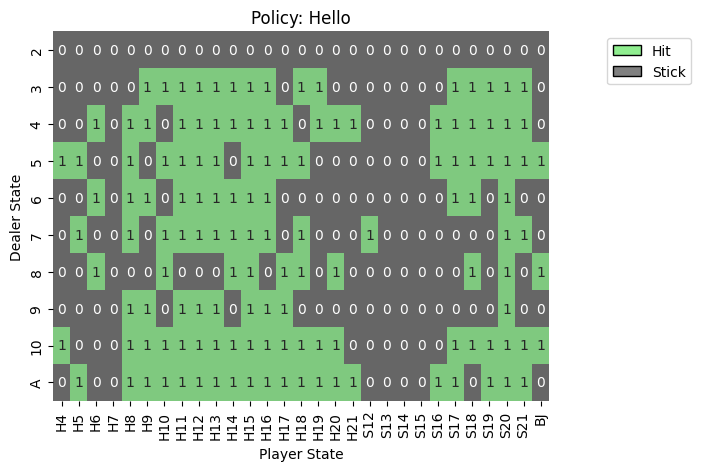

In [189]:
"""Creates a plot using a value and policy grid."""
title="Hello"
from matplotlib.patches import Patch
# create a new figure with 2 subplots (left: state values, right: policy)
# player_count, dealer_count, value = value_grid
# fig = plt.figure(figsize=plt.figaspect(0.4))
# fig.suptitle(title, fontsize=16)

# # plot the state values
# ax1 = fig.add_subplot(1, 2, 1, projection="3d")
# ax1.plot_surface(
#     player_count,
#     dealer_count,
#     value,
#     rstride=1,
#     cstride=1,
#     cmap="viridis",
#     edgecolor="none",
# )
# plt.xticks(range(12, 22), range(12, 22))
# plt.yticks(range(1, 11), ["A"] + list(range(2, 11)))
# ax1.set_title(f"State values: {title}")
# ax1.set_xlabel("Player sum")
# ax1.set_ylabel("Dealer showing")
# ax1.zaxis.set_rotate_label(False)
# ax1.set_zlabel("Value", fontsize=14, rotation=90)
# ax1.view_init(20, 220)

# plot the policy
fig.add_subplot(1, 2, 2)
ax2 = sns.heatmap(policy_grid, linewidth=0, annot=True, cmap="Accent_r", cbar=False)
ax2.set_title(f"Policy: {title}")
ax2.set_xlabel("Player State")
ax2.set_ylabel("Dealer State")
ax2.set_xticklabels(player_states)
ax2.set_yticklabels(dealer_states)

# add a legend
legend_elements = [
    Patch(facecolor="lightgreen", edgecolor="black", label="Hit"),
    Patch(facecolor="grey", edgecolor="black", label="Stick"),
]
ax2.legend(handles=legend_elements, bbox_to_anchor=(1.3, 1))
plt.show()

## Q Learning

## QL BY gamma

In [62]:
wall_clock_times_by_gamma_ql = []
wall_clock_times_std_by_gamma_ql = []
Qs_by_gamma_ql = []
Qs_std_by_gamma_ql = []
Q_tracks_by_gamma_ql = []
Q_tracks_std_by_gamma_ql = []
pis_by_gamma_ql = []
pis_std_by_gamma_ql = []
gammas = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]  # discount factor. 0 == immediate. 1 == long term.
n_iters = 100000
alpha=0.5
for gamma in gammas:
    inner_wall_clock_time = []
    inner_qs = []
    inner_q_tracks = []
    inner_pis = []
    for seed in seeds:
        start = time.time()
        Q, V, pi, Q_track, pi_track = RL(blackjack.env).q_learning(blackjack.n_states, blackjack.n_actions, blackjack.convert_state_obs,
                                                                   gamma=gamma,
                                                                 init_alpha=alpha,
                       min_alpha=0.01,
                       alpha_decay_ratio=0.5,
                       init_epsilon=1.0,
                       min_epsilon=0.1,
                       epsilon_decay_ratio=0.9,
                       n_episodes=n_iters)
        end = time.time()
        running_time = end - start
        print("runtime = %.5f seconds" % running_time)
        inner_wall_clock_time.append(running_time)
        inner_qs.append(Q)
        inner_q_tracks.append(Q_track)
        inner_pis.append(pi)        
    wall_clock_times_by_gamma_ql.append(np.mean(inner_wall_clock_time, axis=0))
    wall_clock_times_std_by_gamma_ql.append(np.std(inner_wall_clock_time, axis=0))
    Qs_by_gamma_ql.append(np.mean(inner_qs, axis=0))
    Qs_std_by_gamma_ql.append(np.std(inner_qs, axis=0))
    Q_tracks_by_gamma_ql.append(np.mean(inner_q_tracks, axis=0))
    Q_tracks_std_by_gamma_ql.append(np.std(inner_q_tracks, axis=0))        

runtime = 19.08 seconds
runtime = 19.10747 seconds


runtime = 19.63 seconds
runtime = 19.72909 seconds


runtime = 21.46 seconds
runtime = 21.56463 seconds


runtime = 21.59 seconds
runtime = 21.69572 seconds


runtime = 21.46 seconds
runtime = 21.54199 seconds


runtime = 18.45 seconds
runtime = 18.69977 seconds


runtime = 17.57 seconds
runtime = 17.63677 seconds


runtime = 17.60 seconds
runtime = 17.65956 seconds


runtime = 20.01 seconds
runtime = 20.07187 seconds


runtime = 19.84 seconds
runtime = 19.89988 seconds


runtime = 20.17 seconds
runtime = 20.43151 seconds


runtime = 18.21 seconds
runtime = 18.26329 seconds


runtime = 20.52 seconds
runtime = 20.57001 seconds


runtime = 19.54 seconds
runtime = 19.58579 seconds


runtime = 20.74 seconds
runtime = 20.78960 seconds


runtime = 18.75 seconds
runtime = 18.98139 seconds


runtime = 17.81 seconds
runtime = 17.86722 seconds


runtime = 20.83 seconds
runtime = 20.88770 seconds


runtime = 19.16 seconds
runtime = 19.21615 seconds


runtime = 19.31 seconds
runtime = 19.36441 seconds


runtime = 19.95 seconds
runtime = 20.21014 seconds


runtime = 18.84 seconds
runtime = 18.88982 seconds


runtime = 18.97 seconds
runtime = 19.03882 seconds


runtime = 19.94 seconds
runtime = 19.99157 seconds


runtime = 18.81 seconds
runtime = 18.86851 seconds


runtime = 18.24 seconds
runtime = 18.38899 seconds


runtime = 19.24 seconds
runtime = 19.30069 seconds


runtime = 17.77 seconds
runtime = 17.82609 seconds


runtime = 18.45 seconds
runtime = 18.50314 seconds


runtime = 20.04 seconds
runtime = 20.10240 seconds


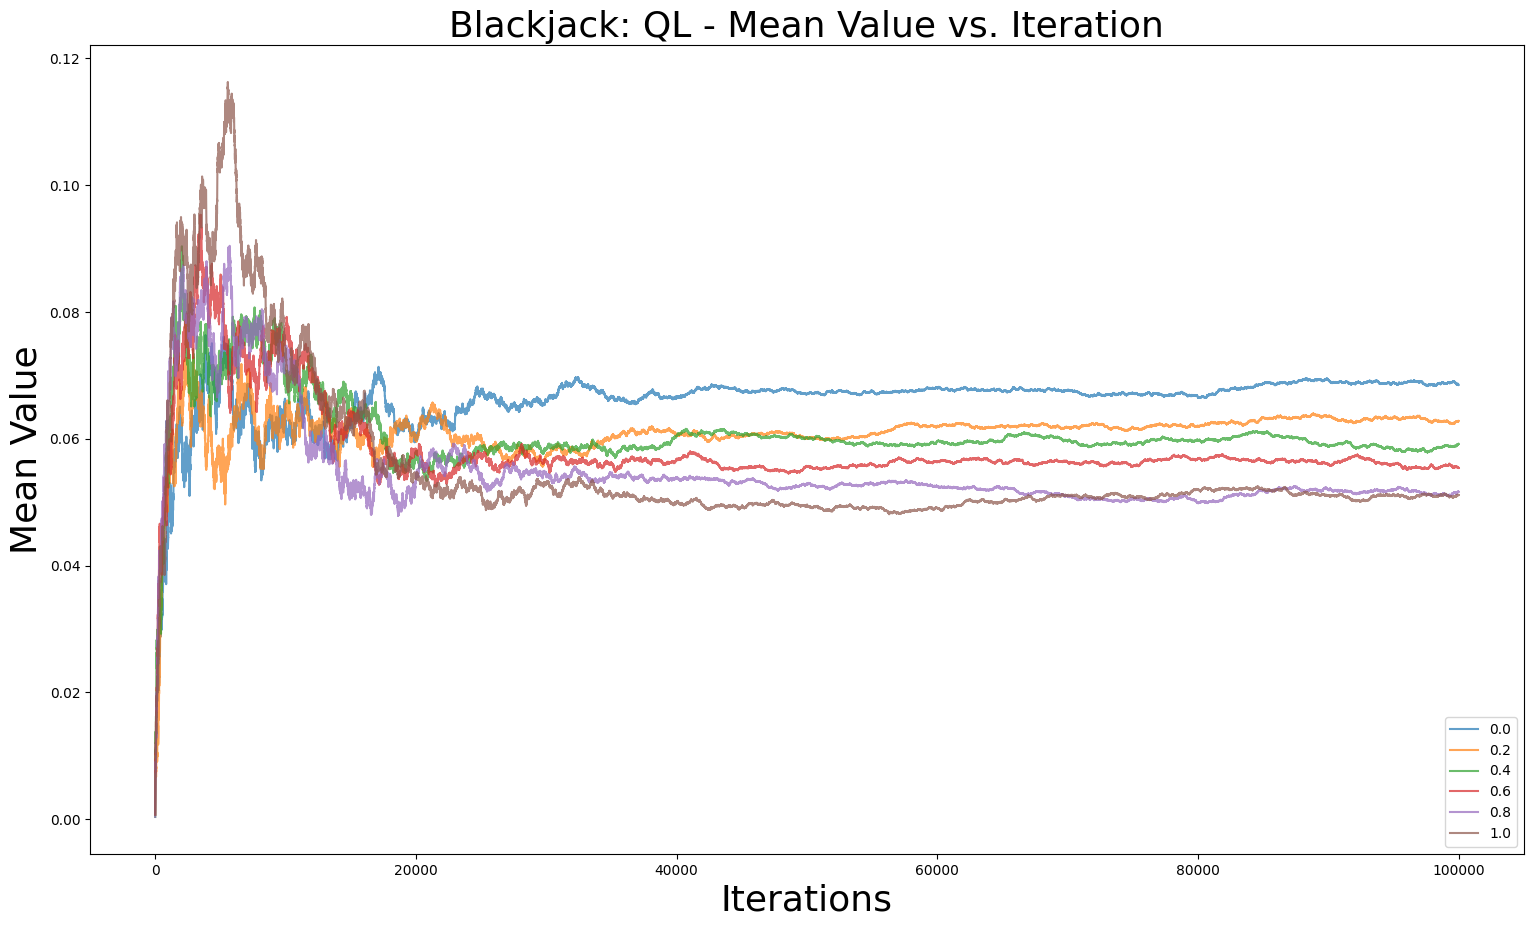

In [74]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
for i in range(len(gammas)):
    mean_value_per_iter = np.mean(np.amax(Q_tracks_by_gamma_ql[i], axis=2), axis=1)  # axis 2 is hit or stay. mean of 290 states  
    ax.plot(range(0,n_iters), mean_value_per_iter, label=gammas[i], alpha=0.7)
#     ax.fill_between(range(0,n_iters), lower_std, upper_std, color='grey', alpha=0.2)
    # ax.set_xscale('log', base=10)
ax.set_title("Blackjack: QL - Mean Value vs. Iteration", fontsize=26)
ax.set_xlabel('Iterations', fontsize=26)
ax.set_ylabel('Mean Value', fontsize=26)
ax.legend(loc='lower right')
plt.savefig("/Users/thomascho/omscs/ML/Markov Decision Processes/charts/bj_ql_gammas.png")
plt.show()

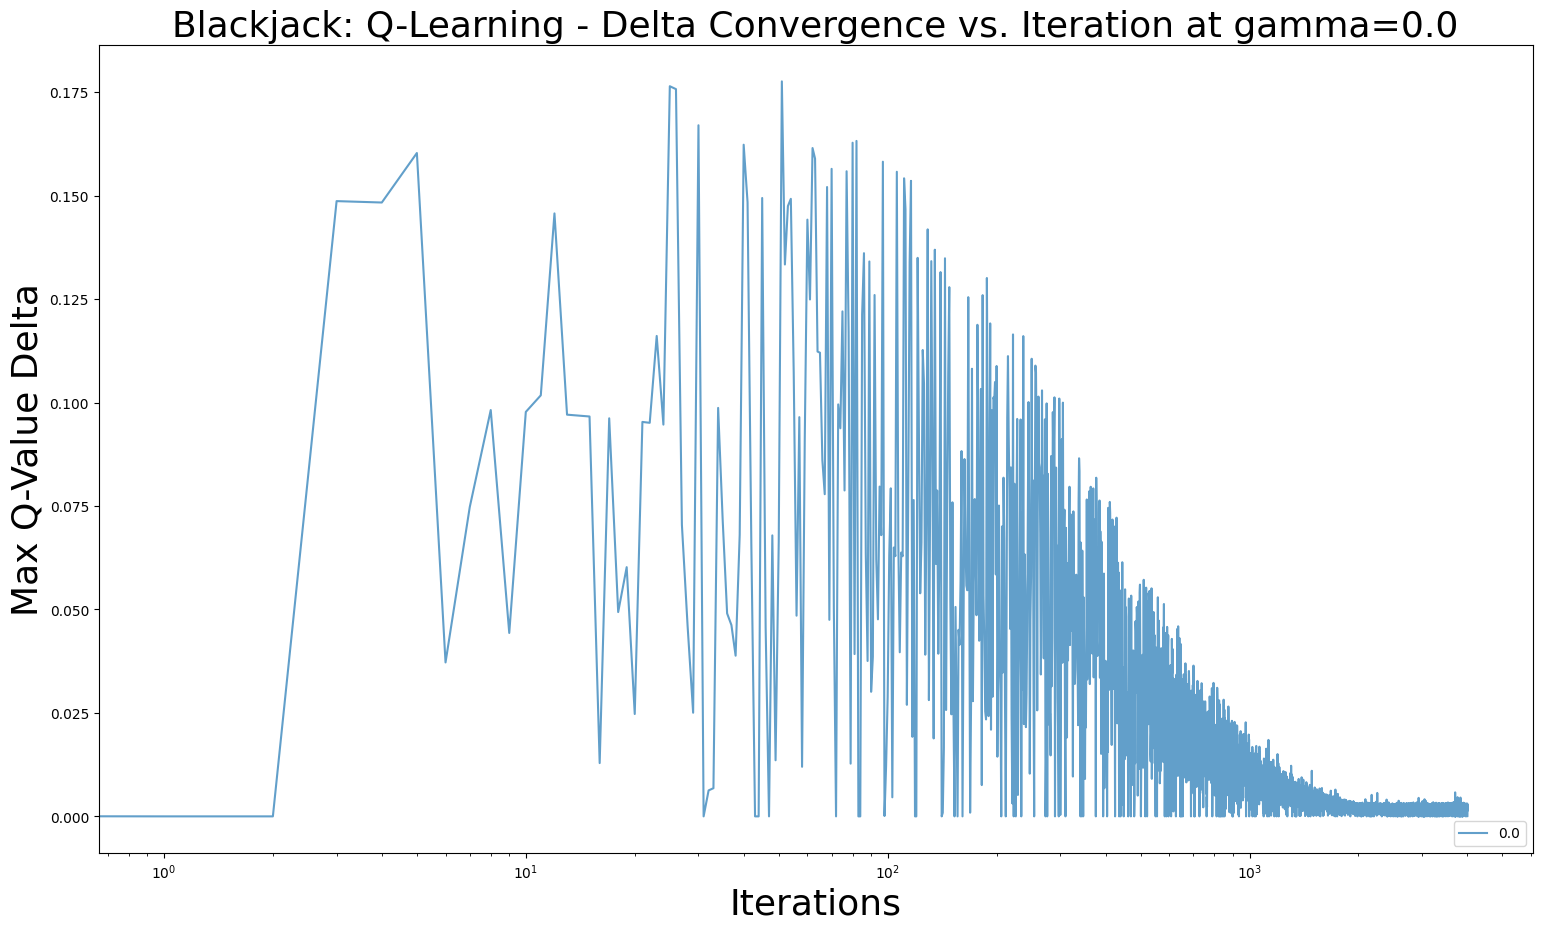

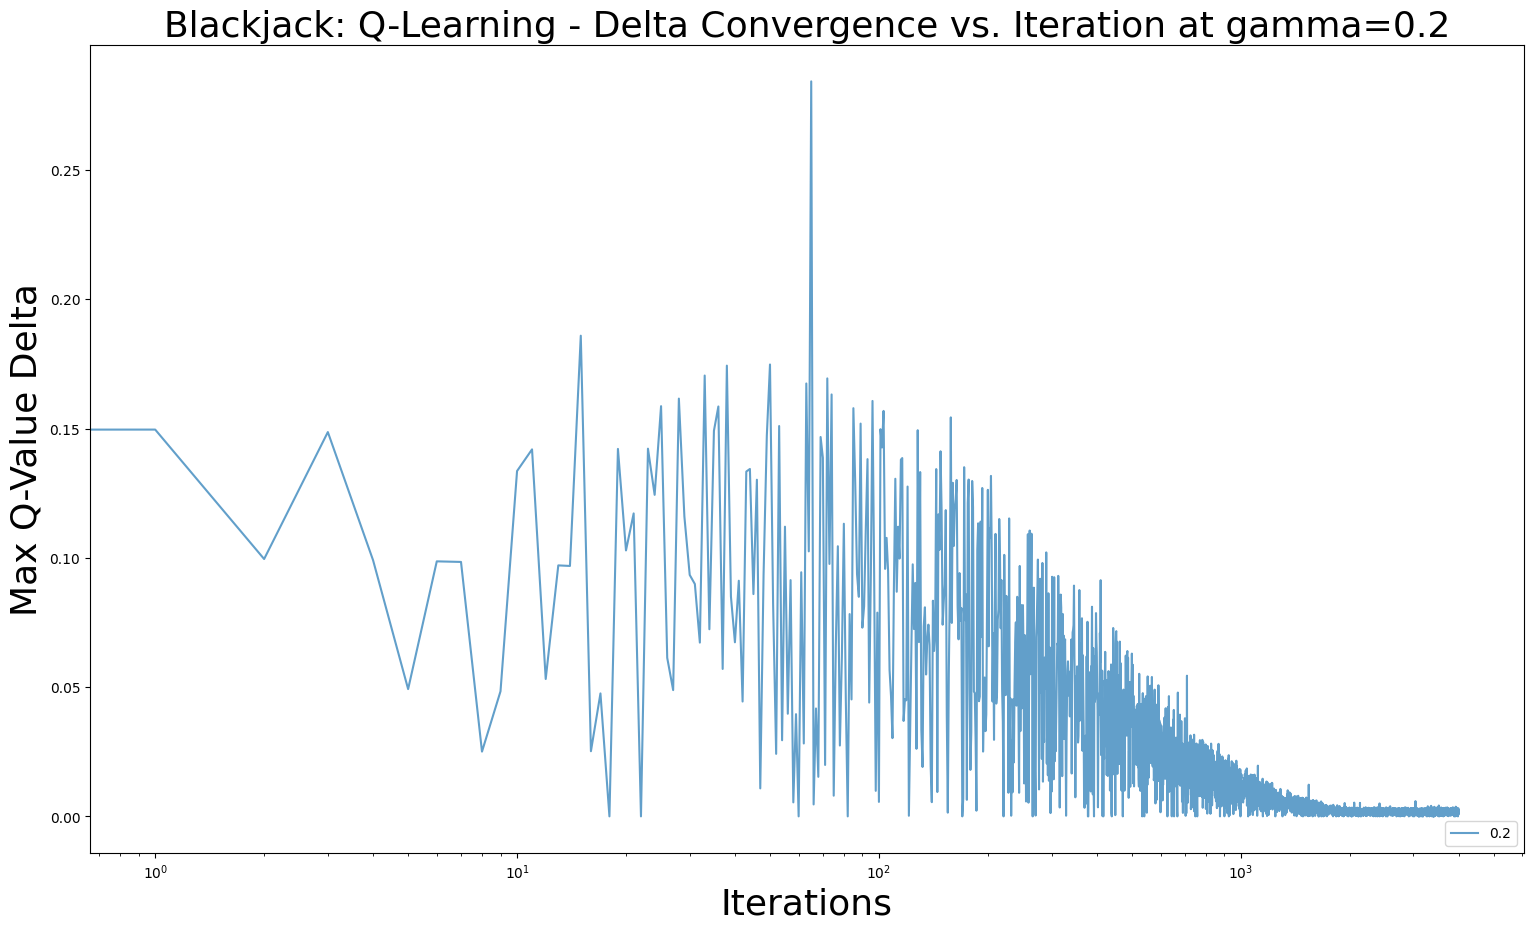

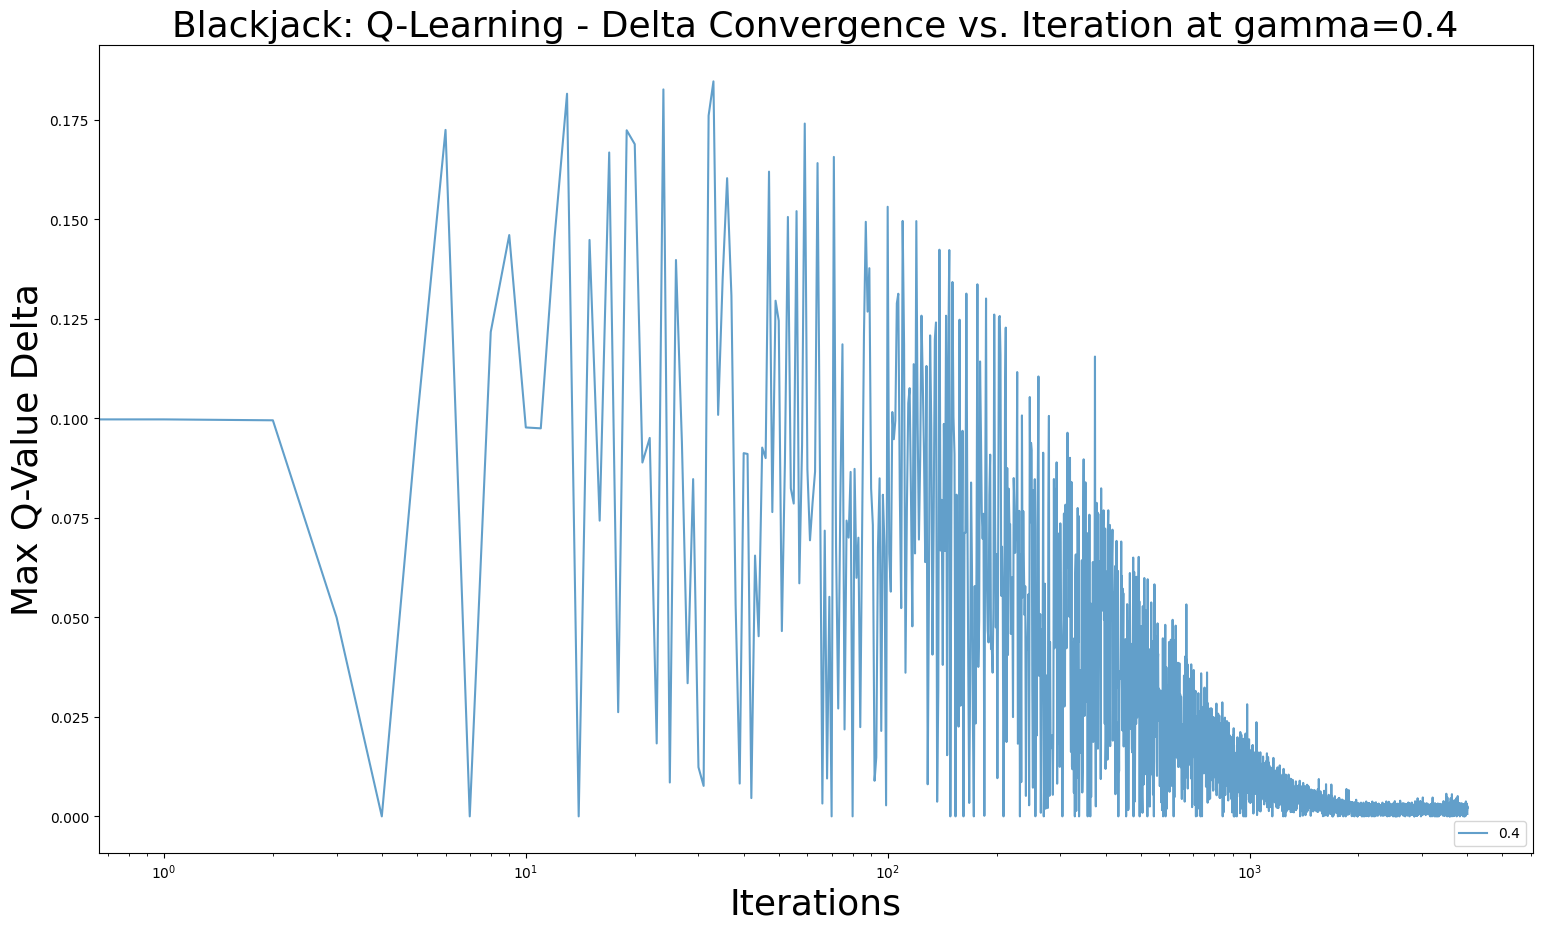

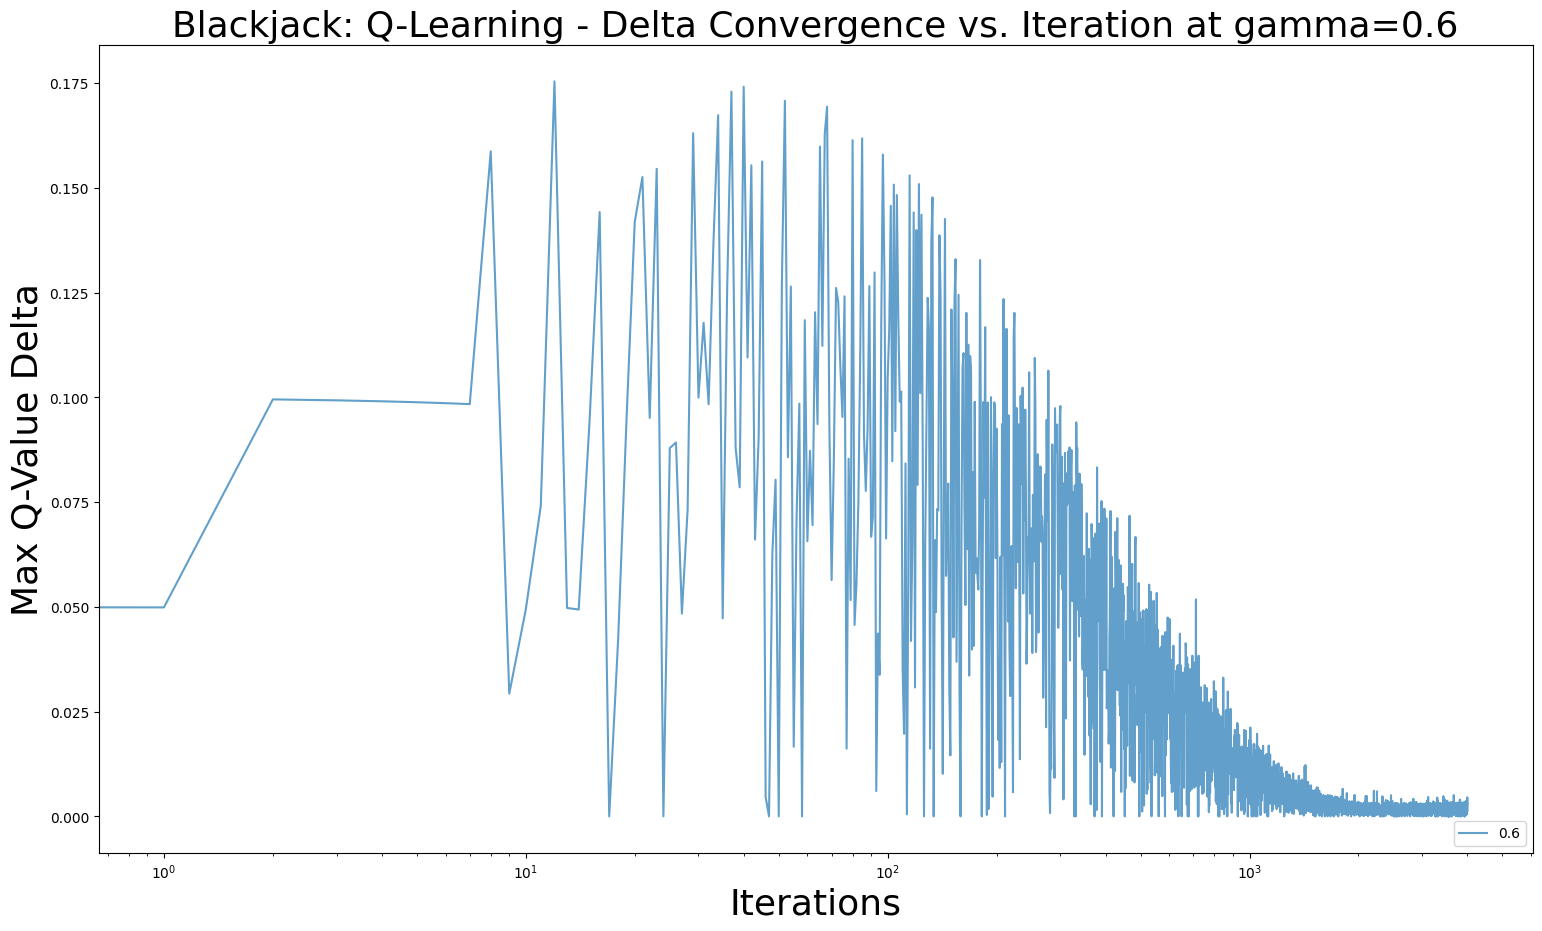

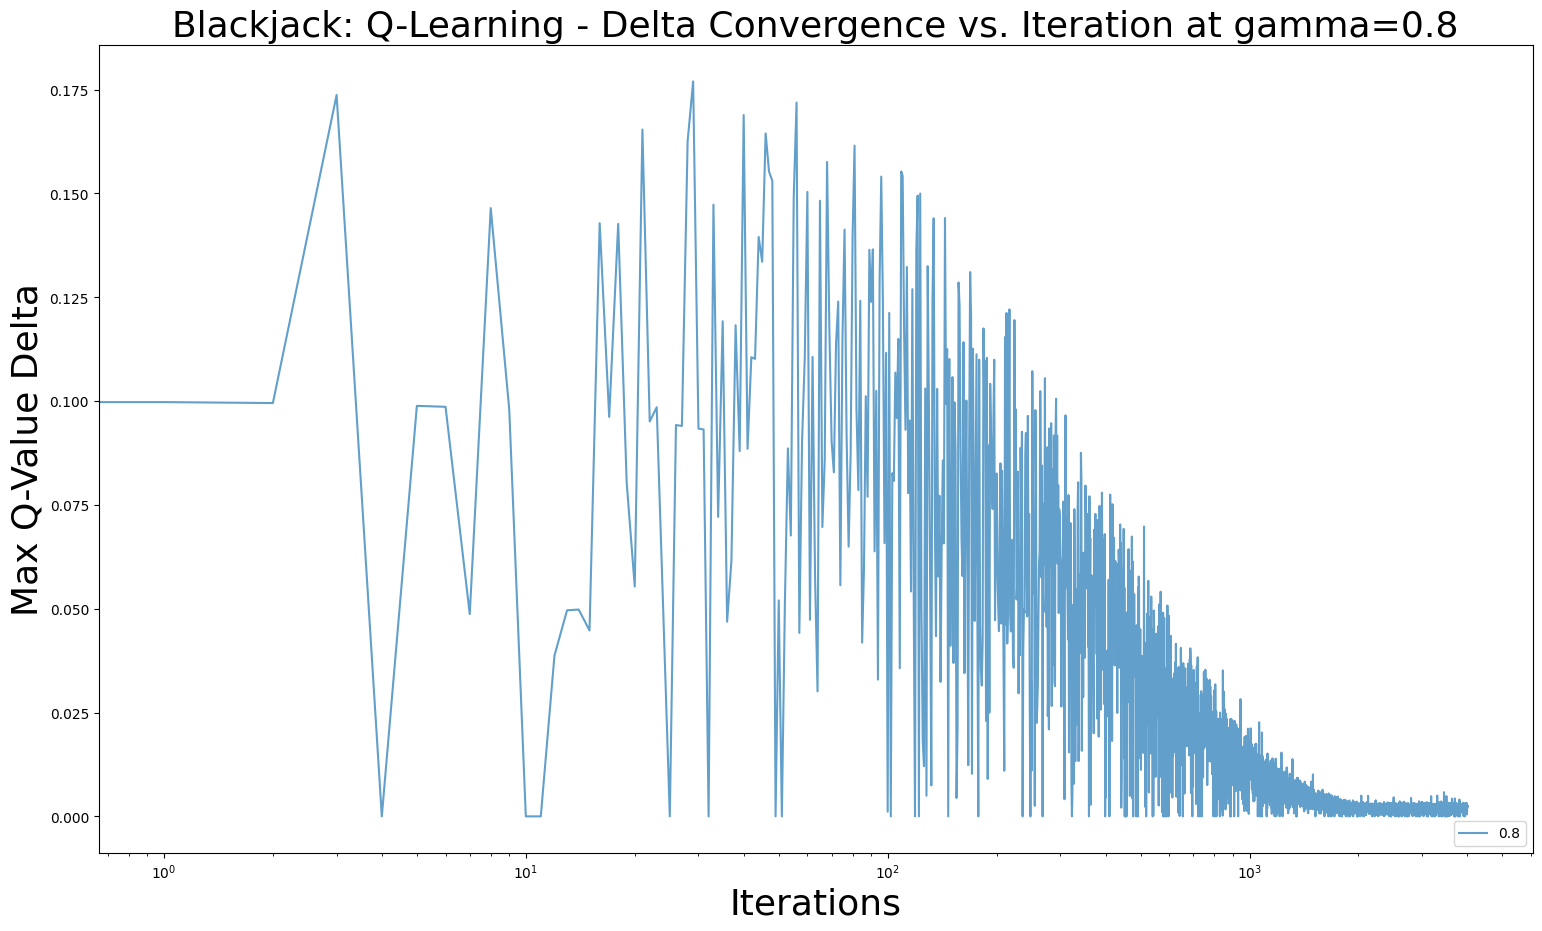

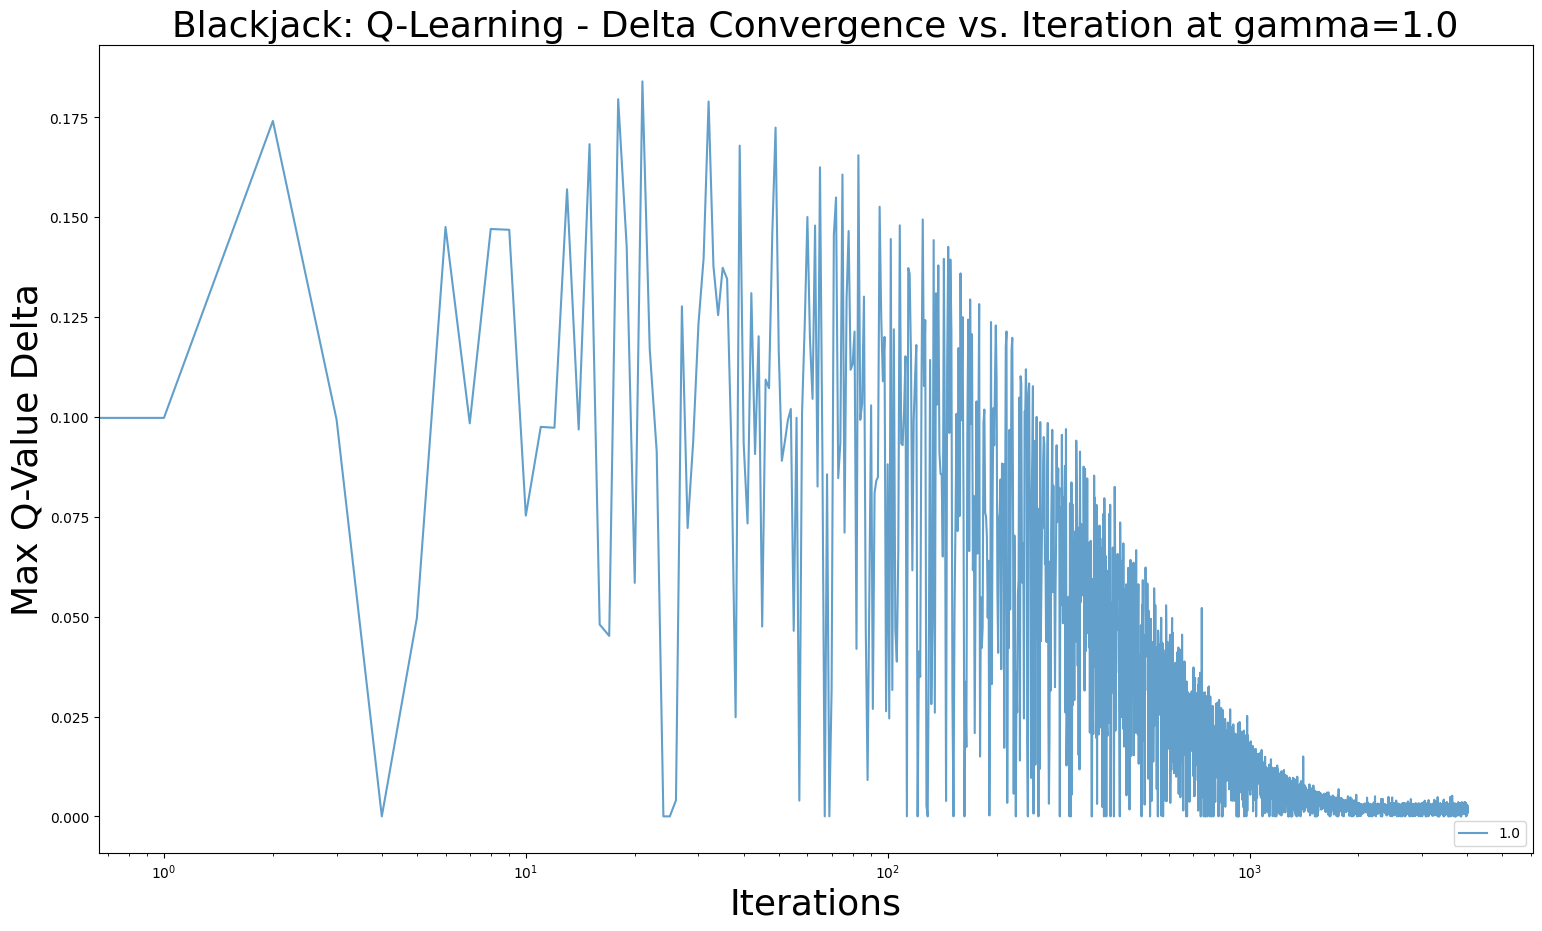

In [73]:

for i in range(len(gammas)):
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    potential_delta = np.amax(np.amax(np.diff(Q_tracks_by_gamma_ql[i], axis=0), axis=1), axis=1)# diff by each state-action, then take the max of each episode, then take the max of all actions
    # lower_std = np.array(max_value_per_iter) - np.array(max_value_per_iter_std)
    # upper_std = np.array(max_value_per_iter) + np.array(max_value_per_iter_std)
    every_ten = potential_delta[::25]
    ax.plot(range(len(every_ten)), every_ten, label=gammas[i], alpha=0.7)
#     ax.plot(range(1,100000), bspl_y, label=gammas[i], alpha=0.7)
    # ax.axvline(x=threshold, color='red', ls='--')
    # ax.fill_between(range(0,n_iters), lower_std, upper_std, color='grey', alpha=0.2)
    ax.set_xscale('log', base=10)
    ax.set_title(f"Blackjack: Q-Learning - Delta Convergence vs. Iteration at gamma={gammas[i]}", fontsize=26)
    ax.set_xlabel('Iterations', fontsize=26)
    ax.set_ylabel('Max Q-Value Delta', fontsize=26)
    ax.legend(loc='lower right')
#     plt.savefig(f"/Users/thomascho/omscs/ML/Markov Decision Processes/charts/bj_ql_delta_gamma_{gammas[i]}.png")
    plt.show()

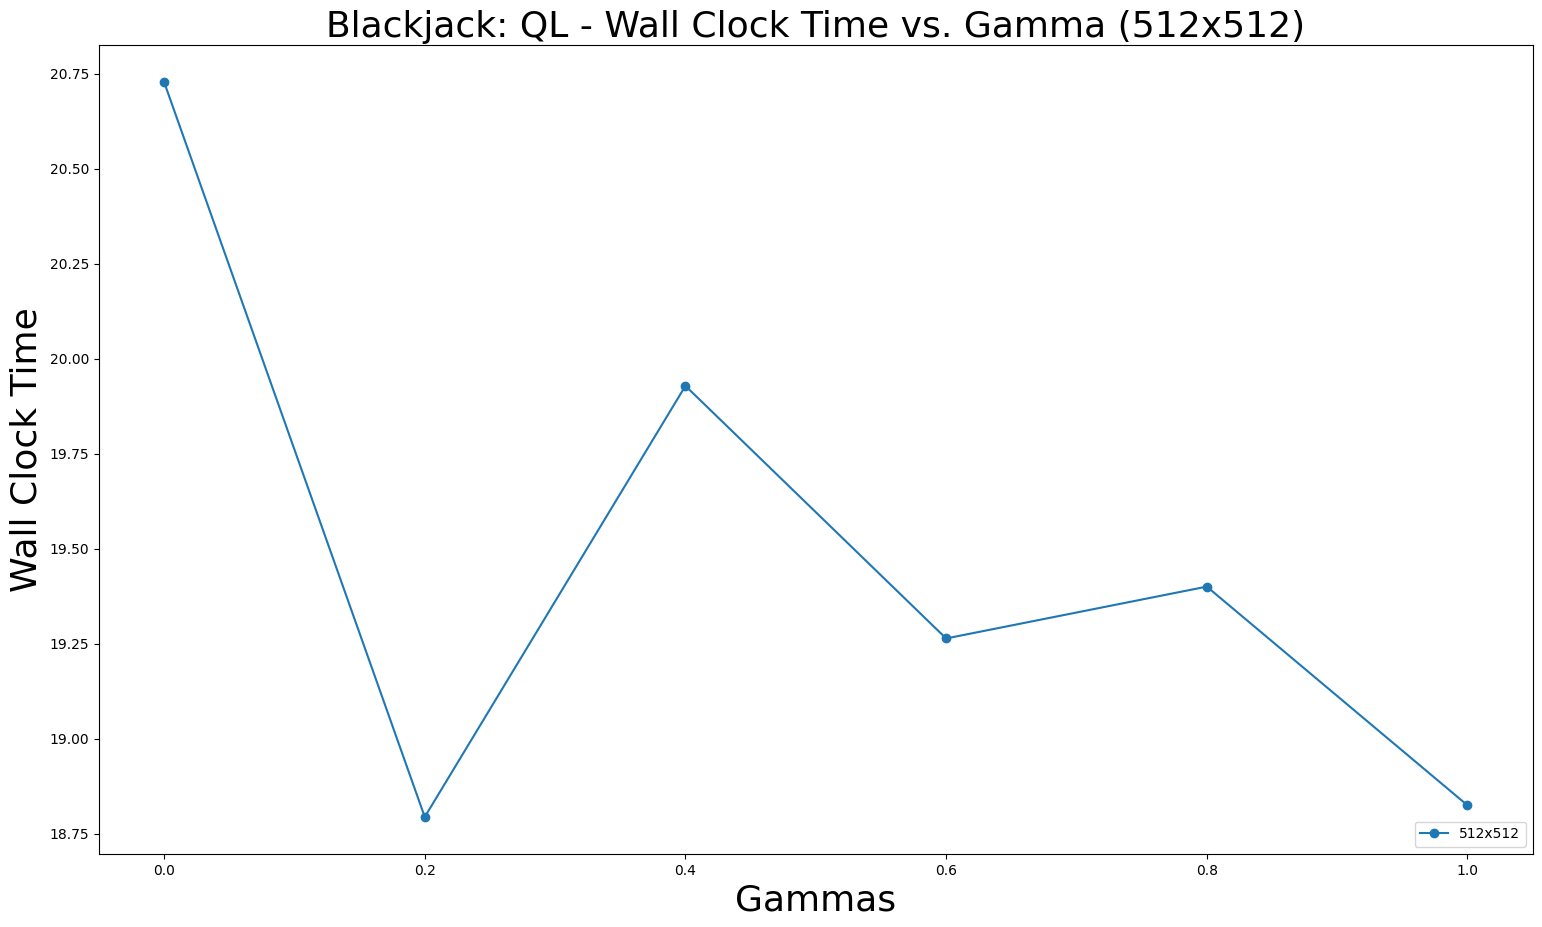

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
# lower_std = np.array(wall_clock_times_by_gamma_vi) - np.array(wall_clock_times_std_by_gamma_vi)
# upper_std = np.array(wall_clock_times_by_gamma_vi) + np.array(wall_clock_times_std_by_gamma_vi)
ax.plot(gammas, wall_clock_times_by_gamma_ql, label="512x512", marker='o')
# ax.fill_between(gammas, lower_std, upper_std, color='grey', alpha=0.2)
ax.set_title("Blackjack: QL - Wall Clock Time vs. Gamma (512x512)", fontsize=26)
ax.set_xlabel('Gammas', fontsize=26)
ax.set_ylabel('Wall Clock Time', fontsize=26)
ax.legend(loc='lower right')

plt.show()

In [66]:
wall_clock_times_by_alpha_ql = []
wall_clock_times_std_by_alpha_ql = []
Qs_by_alpha_ql = []
Qs_std_by_alpha_ql = []
Q_tracks_by_alpha_ql = []
Q_tracks_std_by_alpha_ql = []
pis_by_alpha_ql = []
pis_std_by_alpha_ql = []
gamma=0.5
alphas = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
n_iters = 100000
for alpha in alphas:
    start = time.time()
    Q, V, pi, Q_track, pi_track = RL(blackjack.env).q_learning(blackjack.n_states, blackjack.n_actions, blackjack.convert_state_obs,
                                                               gamma=gamma,
                                                             init_alpha=alpha,
                   min_alpha=0.01,
                   alpha_decay_ratio=0.5,
                   init_epsilon=1.0,
                   min_epsilon=0.1,
                   epsilon_decay_ratio=0.9,
                   n_episodes=n_iters)
    end = time.time()
    running_time = end - start
    print("runtime = %.5f seconds" % running_time)
    wall_clock_times_by_alpha_ql.append(running_time)
    Qs_by_alpha_ql.append(Q)
    Q_tracks_by_alpha_ql.append(Q_track)

runtime = 30.22 seconds
runtime = 30.68049 seconds


runtime = 20.91 seconds
runtime = 21.48373 seconds


runtime = 23.55 seconds
runtime = 23.63943 seconds


runtime = 25.45 seconds
runtime = 26.11228 seconds


runtime = 22.15 seconds
runtime = 23.13999 seconds


runtime = 21.71 seconds
runtime = 22.05460 seconds


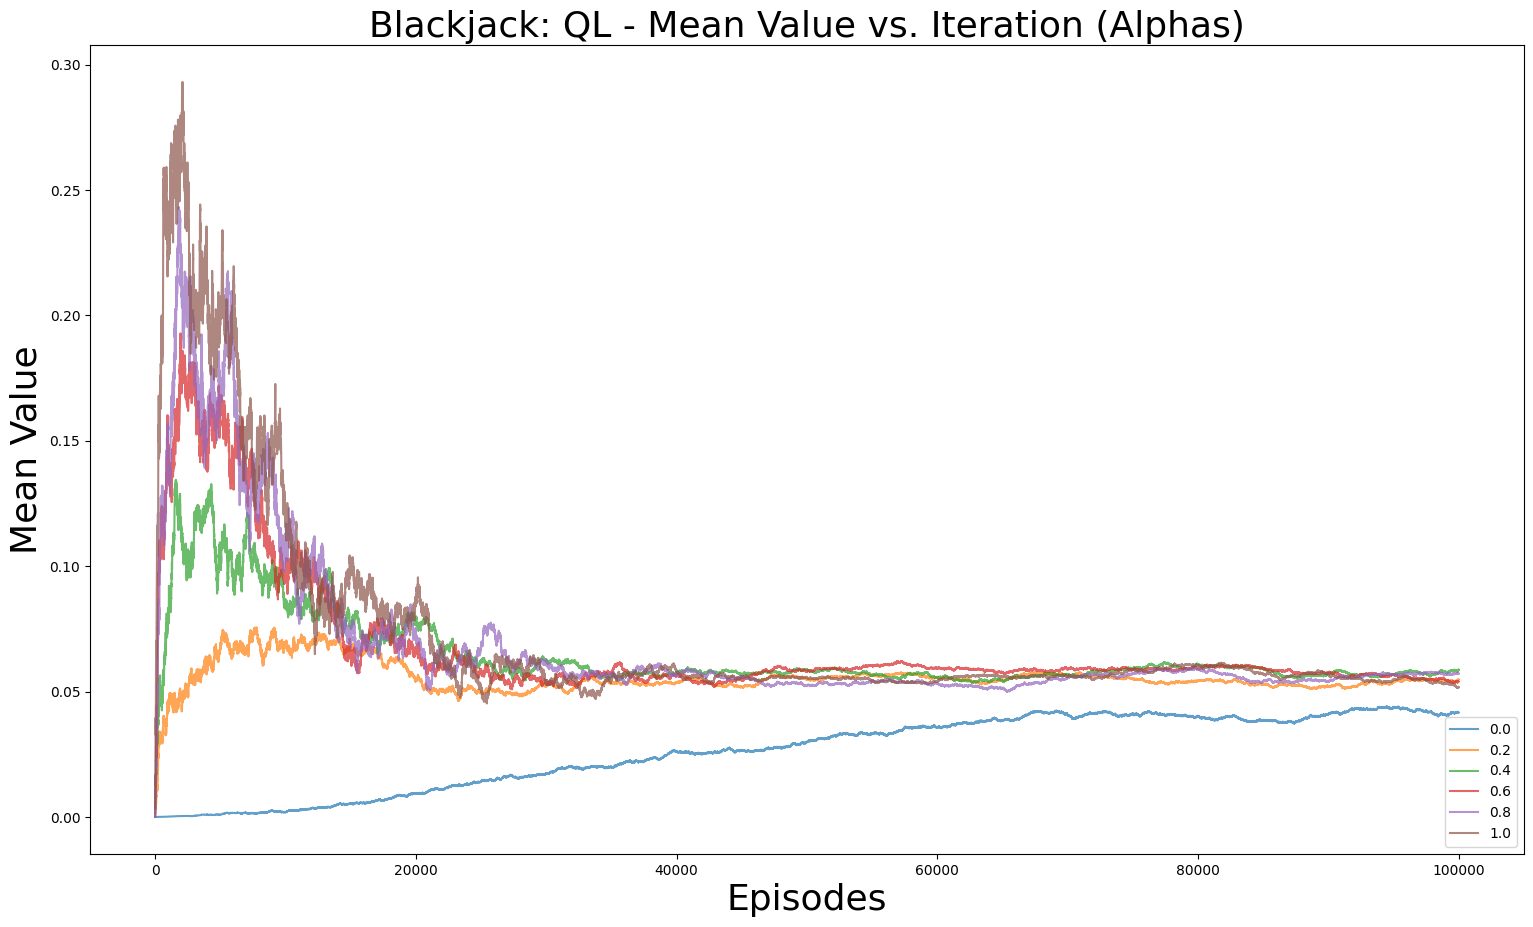

In [96]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
for i in range(len(alphas)):
    mean_value_per_iter = np.mean(np.amax(Q_tracks_by_alpha_ql[i], axis=2), axis=1)  # max value per iteration   
    ax.plot(range(0,n_iters), mean_value_per_iter, label=alphas[i], alpha=0.7)
#     ax.fill_between(range(0,n_iters), lower_std, upper_std, color='grey', alpha=0.2)
    # ax.set_xscale('log', base=10)
ax.set_title("Blackjack: QL - Mean Value vs. Iteration (Alphas)", fontsize=26)
ax.set_xlabel('Episodes', fontsize=26)
ax.set_ylabel('Mean Value', fontsize=26)
ax.legend(loc='lower right')
plt.savefig("/Users/thomascho/omscs/ML/Markov Decision Processes/charts/bj_ql_alphas.png")

plt.show()

In [76]:
wall_clock_times_by_epsilon_ql = []
wall_clock_times_std_by_epsilon_ql = []
Qs_by_epsilon_ql = []
Qs_std_by_epsilon_ql = []
Q_tracks_by_epsilon_ql = []
Q_tracks_std_by_epsilon_ql = []
pis_by_epsilon_ql = []
pis_std_by_epsilon_ql = []
alpha = .5
gamma=0.5
epsilons = [0.2, 0.4, 0.6, 0.8, 1.0]
n_iters = 100000
for epsilon in epsilons:
    start = time.time()
    Q, V, pi, Q_track, pi_track = RL(blackjack.env).q_learning(blackjack.n_states, blackjack.n_actions, blackjack.convert_state_obs,
                                                               gamma=gamma,
                                                             init_alpha=alpha,
                   min_alpha=0.01,
                   alpha_decay_ratio=0.5,
                   init_epsilon=epsilon,
                   min_epsilon=0.1,
                   epsilon_decay_ratio=0.9,
                   n_episodes=n_iters)
    end = time.time()
    running_time = end - start
    print("runtime = %.5f seconds" % running_time)
    wall_clock_times_by_epsilon_ql.append(running_time)
    Qs_by_epsilon_ql.append(Q)
    Q_tracks_by_epsilon_ql.append(Q_track)

runtime = 20.70 seconds
runtime = 21.42027 seconds


runtime = 22.34 seconds
runtime = 22.45200 seconds


runtime = 21.81 seconds
runtime = 21.87832 seconds


runtime = 20.59 seconds
runtime = 20.68797 seconds


runtime = 25.37 seconds
runtime = 26.04123 seconds


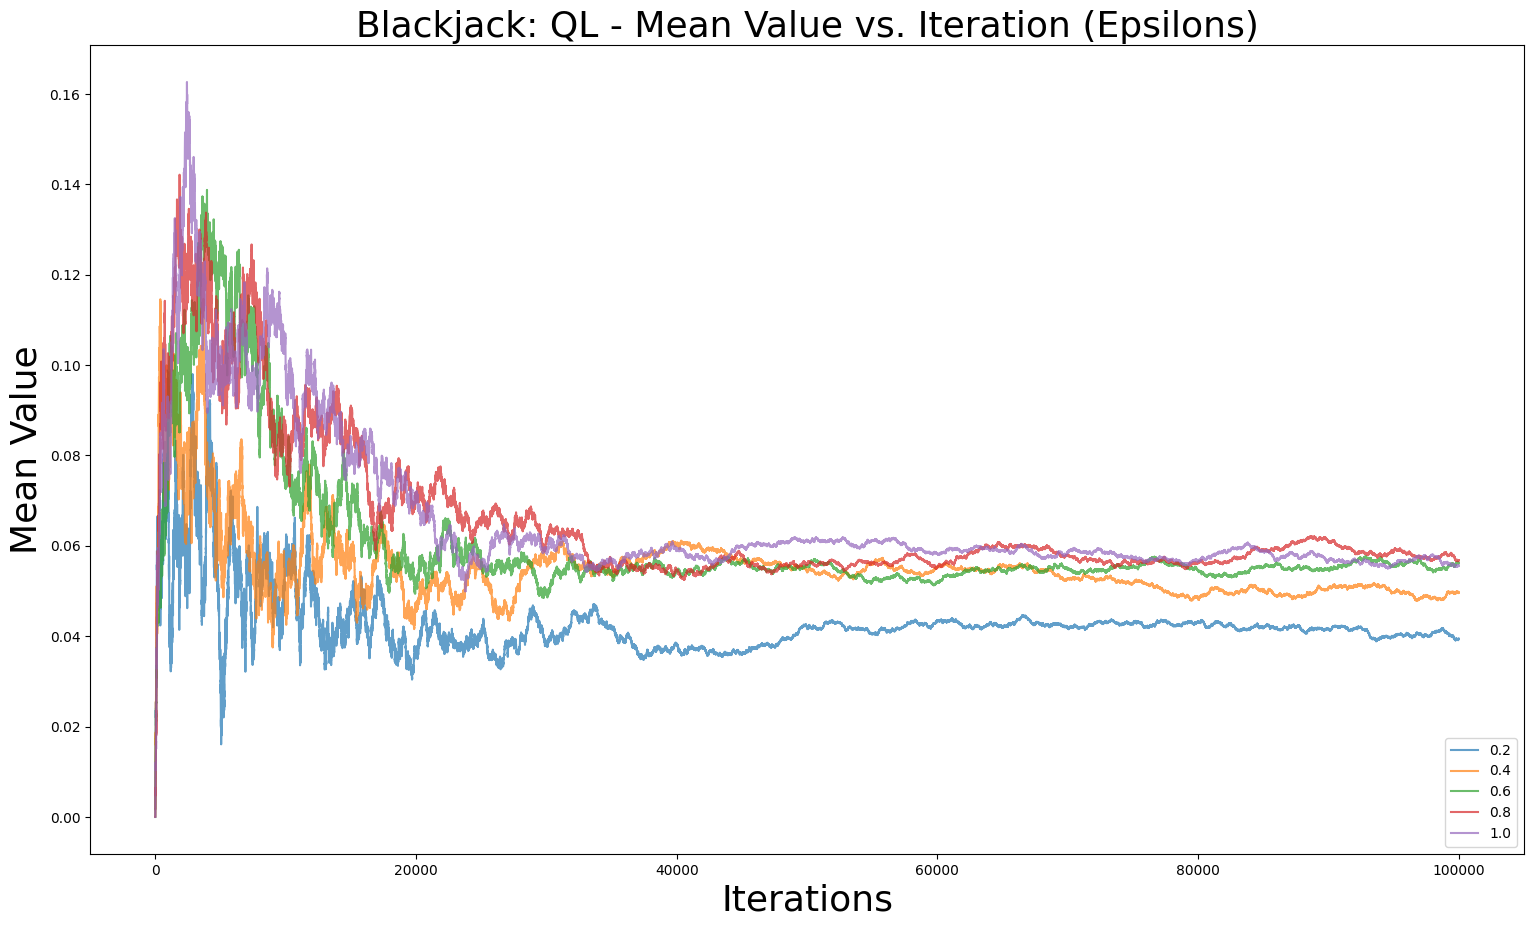

In [81]:
'''
Plot Max state values vs iterations AND PLOT DIFFERENT GAMMAS
'''
# Plot the policy grid
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
for i in range(len(epsilons)):
    mean_value_per_iter = np.mean(np.amax(Q_tracks_by_epsilon_ql[i], axis=2), axis=1)  # max value per iteration   
    ax.plot(range(0,n_iters), mean_value_per_iter, label=epsilons[i], alpha=0.7)
#     ax.fill_between(range(0,n_iters), lower_std, upper_std, color='grey', alpha=0.2)
    # ax.set_xscale('log', base=10)
ax.set_title("Blackjack: QL - Mean Value vs. Iteration (Epsilons)", fontsize=26)
ax.set_xlabel('Iterations', fontsize=26)
ax.set_ylabel('Mean Value', fontsize=26)
ax.legend(loc='lower right')
plt.savefig("/Users/thomascho/omscs/ML/Markov Decision Processes/charts/bj_ql_epsilon.png")

plt.show()

In [78]:
wall_clock_times_by_epsilon_decay_ql = []
wall_clock_times_std_by_epsilon_decay_ql = []
Qs_by_epsilon_decay_ql = []
Qs_std_by_epsilon_decay_ql = []
Q_tracks_by_epsilon_decay_ql = []
Q_tracks_std_by_epsilon_decay_ql = []
pis_by_epsilon_decay_ql = []
pis_std_by_epsilon_decay_ql = []
alpha = .5
gamma=0.5
epsilon=1.0
epsilon_decays = [0.1, 0.5, 0.9]
n_iters = 100000
for epsilon_decay in epsilon_decays:
    start = time.time()
    Q, V, pi, Q_track, pi_track = RL(blackjack.env).q_learning(blackjack.n_states, blackjack.n_actions, blackjack.convert_state_obs,
                                                               gamma=gamma,
                                                             init_alpha=alpha,
                   min_alpha=0.01,
                   alpha_decay_ratio=0.5,
                   init_epsilon=epsilon,
                   min_epsilon=0.1,
                   epsilon_decay_ratio=epsilon_decay,
                   n_episodes=n_iters)
    end = time.time()
    running_time = end - start
    print("runtime = %.5f seconds" % running_time)
    wall_clock_times_by_epsilon_decay_ql.append(running_time)
    Qs_by_epsilon_decay_ql.append(Q)
    Q_tracks_by_epsilon_decay_ql.append(Q_track)

runtime = 22.36 seconds
runtime = 23.14952 seconds


runtime = 20.77 seconds
runtime = 21.23095 seconds


runtime = 19.44 seconds
runtime = 19.52563 seconds


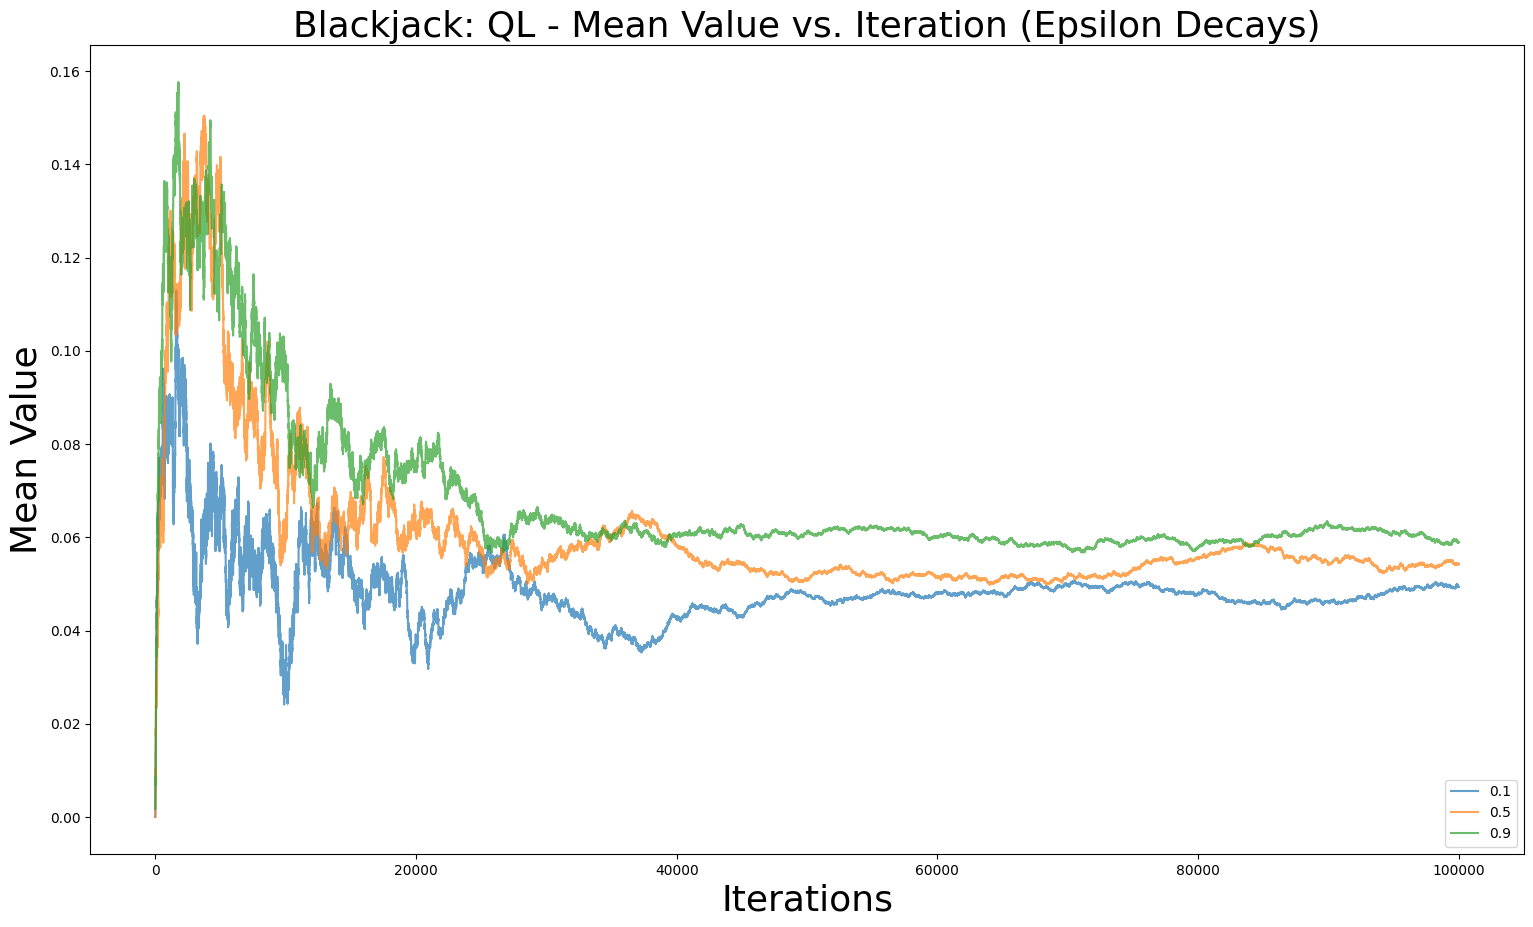

In [97]:
'''
Plot Max state values vs iterations AND PLOT DIFFERENT GAMMAS
'''
# Plot the policy grid
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
for i in range(len(epsilon_decays)):
    mean_value_per_iter = np.mean(np.amax(Q_tracks_by_epsilon_decay_ql[i], axis=2), axis=1)  # max value per iteration   
    ax.plot(range(0,n_iters), mean_value_per_iter, label=epsilon_decays[i], alpha=0.7)
#     ax.fill_between(range(0,n_iters), lower_std, upper_std, color='grey', alpha=0.2)
    # ax.set_xscale('log', base=10)
ax.set_title("Blackjack: QL - Mean Value vs. Iteration (Epsilon Decays)", fontsize=26)
ax.set_xlabel('Iterations', fontsize=26)
ax.set_ylabel('Mean Value', fontsize=26)
ax.legend(loc='lower right')
plt.savefig("/Users/thomascho/omscs/ML/Markov Decision Processes/charts/bj_ql_epsilon_decay.png")

plt.show()

In [92]:
wall_clock_times_by_epsilon_ql = wall_clock_times_by_epsilon_ql[-5:]

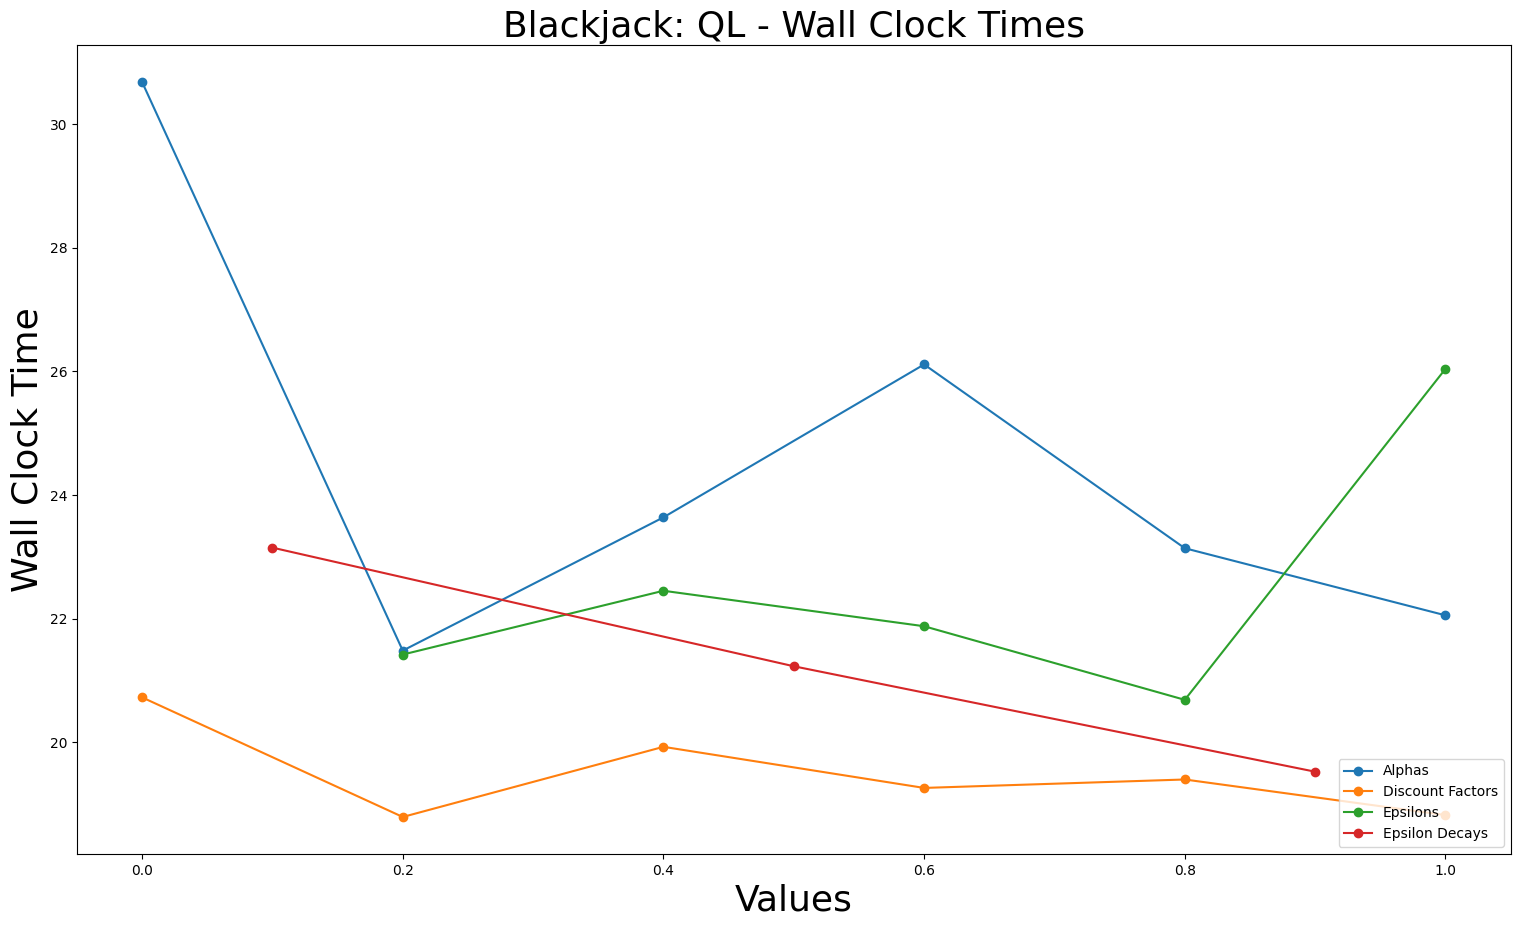

In [137]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax.plot(gammas, wall_clock_times_by_alpha_ql, label="Alphas", marker='o')
ax.plot(gammas, wall_clock_times_by_gamma_ql, label="Discount Factors", marker='o')

wall_clock_times_by_epsilon_ql2 = wall_clock_times_by_epsilon_ql.copy()
wall_clock_times_by_epsilon_ql2.insert(0,None)
epsilon_decays2 = [wall_clock_times_by_epsilon_decay_ql[0], None, wall_clock_times_by_epsilon_decay_ql[1], None, wall_clock_times_by_epsilon_decay_ql[2], None]
ax.plot(gammas, wall_clock_times_by_epsilon_ql2, label="Epsilons", marker='o')

ax.plot(epsilon_decays, wall_clock_times_by_epsilon_decay_ql, label="Epsilon Decays", marker='o')
# ax.fill_between(gammas, lower_std, upper_std, color='grey', alpha=0.2)
ax.set_title("Blackjack: QL - Wall Clock Times", fontsize=26)
ax.set_xlabel('Values', fontsize=26)
ax.set_ylabel('Wall Clock Time', fontsize=26)
ax.legend(loc='lower right')
plt.savefig("/Users/thomascho/omscs/ML/Markov Decision Processes/charts/bj_ql_times.png")
plt.show()


In [87]:
wall_clock_times_by_epsilon_ql

[None,
 None,
 None,
 None,
 None,
 21.420268058776855,
 22.451995849609375,
 21.87831974029541,
 20.68797206878662,
 26.041227102279663]

In [131]:
Q, V, pi, Q_track, pi_track = RL(blackjack.env).q_learning(blackjack.n_states, blackjack.n_actions, blackjack.convert_state_obs,
                                                           gamma=.8,
                                                         init_alpha=1.0,
               min_alpha=0.01,
               alpha_decay_ratio=0.5,
               init_epsilon=1.0,
               min_epsilon=0.1,
               epsilon_decay_ratio=.9,
               n_episodes=n_iters)

runtime = 19.05 seconds


In [109]:
from collections import defaultdict

"""
self.convert_state_obs = lambda state, done: ( -1 if done else int(f"{state[0] + 6}{(state[1] - 2) % 10}") if state[2] else int(f"{state[0] - 4}{(state[1] - 2) % 10}"))

"""

usable_ace = False

state_value = defaultdict(float)
policy = defaultdict(int)
for key, value in converted.items():  # key is tuple and value is the index of Q
    
    obs, action_values = key, Q[value]  # key is the tuple. action_values is the Q value at the index from value
    state_value[obs] = float(np.max(action_values))
    policy[obs] = int(np.argmax(action_values))
    
    
player_count, dealer_count = np.meshgrid(
        # players count, dealers face-up card
        np.array(["H4", "H5", "H6", "H7", "H8", "H9", "H10", "H11", "H12", "H13", "H14", "H15", "H16", "H17", "H18", "H19", "H20", "H21",
                 " S12", "S13", "S14", "S15", "S16", "S17", "S18", "S19", "S20", "S21", "BJ"]),
        np.arange(1, 11),
    )
 # create the value grid for plotting
value = np.apply_along_axis(
    lambda obs: state_value[(obs[0], obs[1], usable_ace)],
    axis=2,
    arr=np.dstack([player_count, dealer_count]),
)
value_grid = player_count, dealer_count, value

# create the policy grid for plotting
policy_grid = np.apply_along_axis(
    lambda obs: policy[(obs[0], obs[1], usable_ace)],
    axis=2,
    arr=np.dstack([player_count, dealer_count]),
)



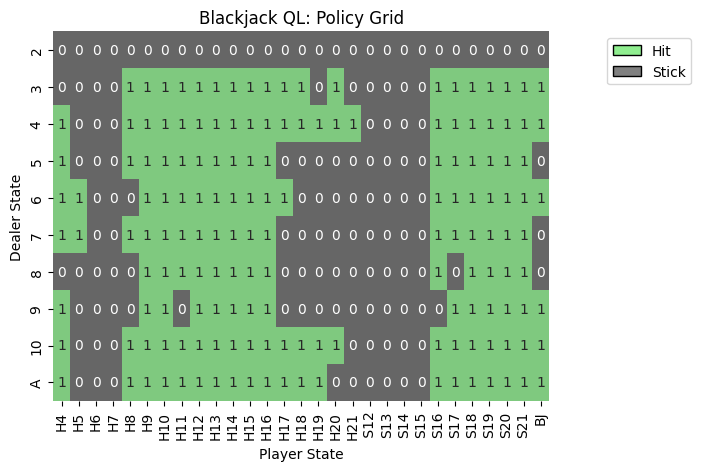

In [133]:
"""Creates a plot using a value and policy grid."""
title="Hello"
from matplotlib.patches import Patch
# create a new figure with 2 subplots (left: state values, right: policy)
# player_count, dealer_count, value = value_grid
# fig = plt.figure(figsize=plt.figaspect(0.4))
# fig.suptitle(title, fontsize=16)

# # plot the state values
# ax1 = fig.add_subplot(1, 2, 1, projection="3d")
# ax1.plot_surface(
#     player_count,
#     dealer_count,
#     value,
#     rstride=1,
#     cstride=1,
#     cmap="viridis",
#     edgecolor="none",
# )
# plt.xticks(range(12, 22), range(12, 22))
# plt.yticks(range(1, 11), ["A"] + list(range(2, 11)))
# ax1.set_title(f"State values: {title}")
# ax1.set_xlabel("Player sum")
# ax1.set_ylabel("Dealer showing")
# ax1.zaxis.set_rotate_label(False)
# ax1.set_zlabel("Value", fontsize=14, rotation=90)
# ax1.view_init(20, 220)

# plot the policy
fig.add_subplot(1, 2, 2)
ax2 = sns.heatmap(policy_grid, linewidth=0, annot=True, cmap="Accent_r", cbar=False)
ax2.set_title(f"Blackjack QL: Policy Grid")
ax2.set_xlabel("Player State")
ax2.set_ylabel("Dealer State")
ax2.set_xticklabels(player_states)
ax2.set_yticklabels(dealer_states)

# add a legend
legend_elements = [
    Patch(facecolor="lightgreen", edgecolor="black", label="Hit"),
    Patch(facecolor="grey", edgecolor="black", label="Stick"),
]
ax2.legend(handles=legend_elements, bbox_to_anchor=(1.3, 1))
plt.savefig("/Users/thomascho/omscs/ML/Markov Decision Processes/charts/bj_ql_policy.png")
plt.show()

In [113]:
policy_grid2 = np.zeros((10, 29))
index = 0
for i in range(10):
    for j in range(29):
        policy_grid2[i][j] = pi[index]
        index += 1

# plot the policy
fig.add_subplot(1, 2, 2)
ax2 = sns.heatmap(policy_grid2, linewidth=0, annot=True, cmap="Accent_r", cbar=False)
ax2.set_title(f"Policy: {title}")
ax2.set_xlabel("Player State")
ax2.set_ylabel("Dealer State")
ax2.set_xticklabels(player_states)
ax2.set_yticklabels(dealer_states)

# add a legend
legend_elements = [
    Patch(facecolor="lightgreen", edgecolor="black", label="Hit"),
    Patch(facecolor="grey", edgecolor="black", label="Stick"),
]
ax2.legend(handles=legend_elements, bbox_to_anchor=(1.3, 1))
plt.savefig("/Users/thomascho/omscs/ML/Markov Decision Processes/charts/fl_ql_large_reward_shaped_gammas2.png")
plt.show()